# <center>Product Recommender System to identify `cross-sell opportunities`</center>


## Context

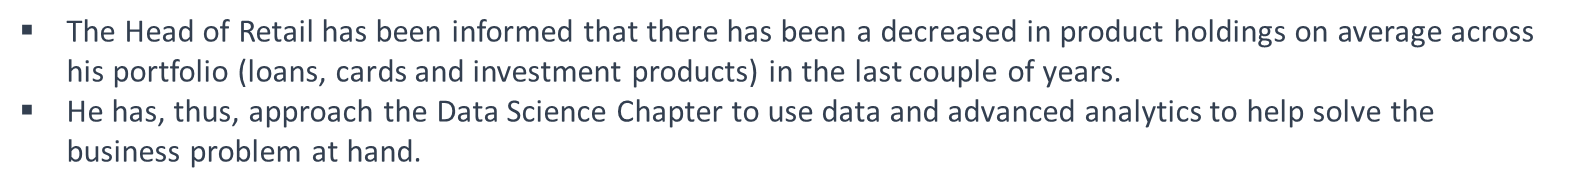


## Objective

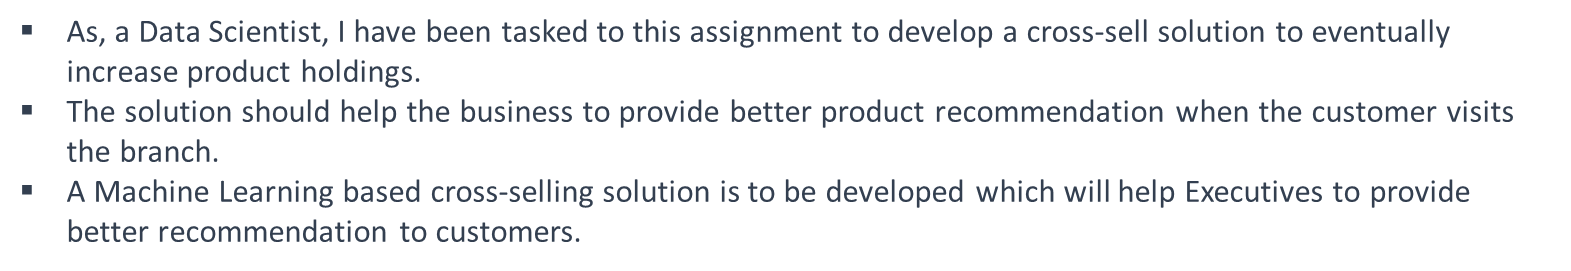

## Approach

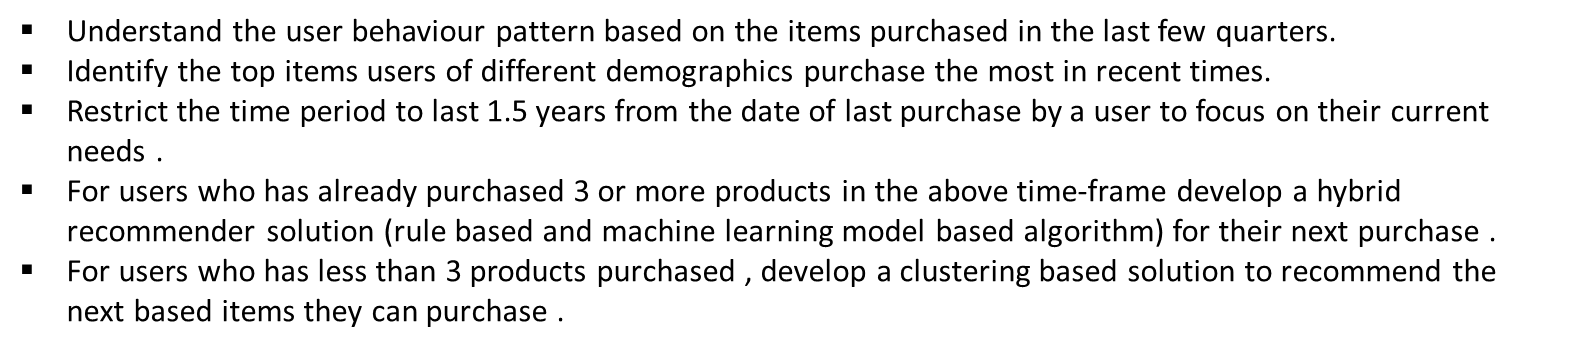


# Data Dictionary

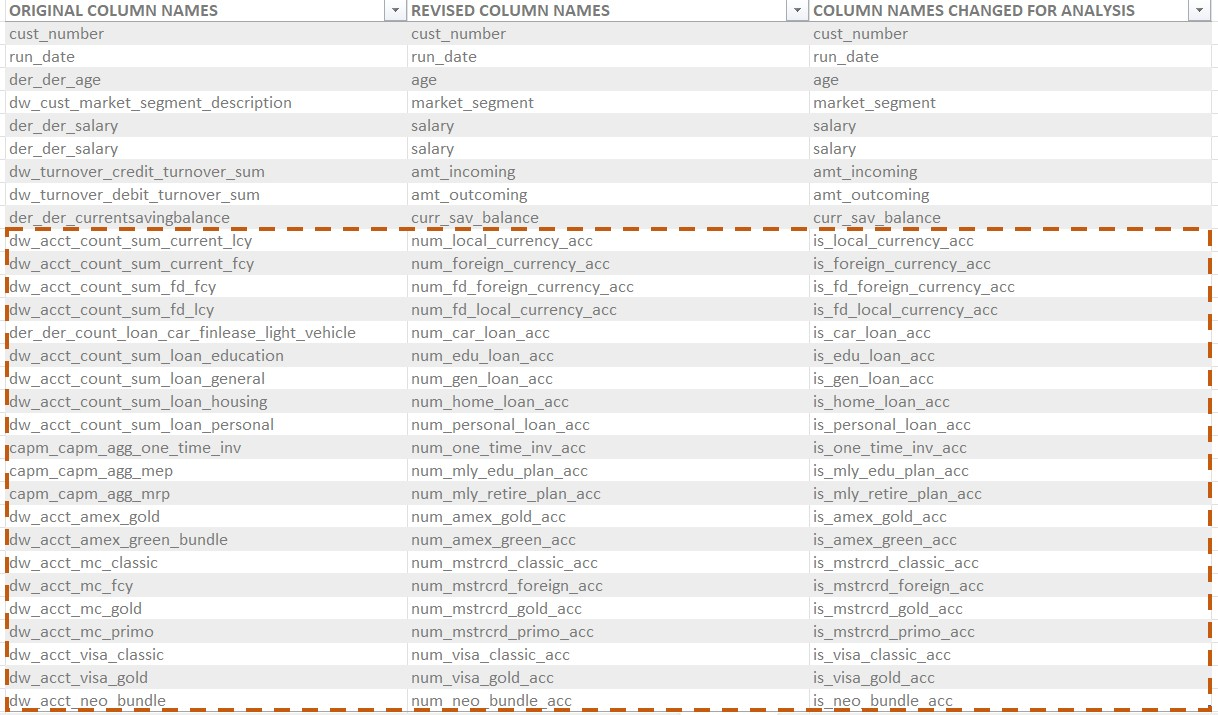

***The columns identifying the products that a customer purchase is marked within the brown squared area.***

# 1. Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")


# Similarity calculation
from sklearn.metrics.pairwise import cosine_similarity

# Import ML libraries
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from wordcloud import WordCloud


import os
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('Agg')

import sklearn
import imblearn

from sklearn.metrics import *
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression as lor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

import catboost
from catboost import CatBoostClassifier
import seaborn as sns

from sklearn.model_selection import GridSearchCV


import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install lightgbm

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 2. Load the Data

In [5]:
path_m = os.getcwd()

def dir_up(path,n):
    for _ in range(n):
        path = dir_up(path.rpartition("\\")[0], 0)
    return(path)

path_d = os.path.join(dir_up(path_m,1),'Input')

In [6]:
data = pd.read_csv(os.path.join(path_d,'Data Scientist Data Assessment.csv'))

In [7]:
data= data[data.der_der_currentsavingbalance>0] ## do not consider customers with negative value of savings balance

In [8]:
data.run_date.unique()

array([2018.75, 2019.  , 2019.25, 2019.5 , 2019.75, 2020.  , 2020.25,
       2020.5 , 2020.75, 2021.  , 2021.25, 2021.5 , 2021.75, 2022.  ,
       2022.25, 2022.5 , 2022.75, 2023.  , 2023.25])

In [9]:
data.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99],include=['object', 'float', 'int'])

,run_date,der_der_age,dw_cust_market_segment_description,der_der_salary,dw_turnover_credit_turnover_sum,dw_turnover_debit_turnover_sum,der_der_currentsavingbalance,dw_acct_count_sum_current_lcy,dw_acct_count_sum_current_fcy,dw_acct_count_sum_fd_fcy,dw_acct_count_sum_fd_lcy,der_der_count_loan_car_finlease_light_vehicle,dw_acct_count_sum_loan_education,dw_acct_count_sum_loan_general,dw_acct_count_sum_loan_housing,dw_acct_count_sum_loan_personal,capm_capm_agg_one_time_inv,capm_capm_agg_mep,capm_capm_agg_mrp,dw_acct_amex_gold,dw_acct_amex_green_bundle,dw_acct_mc_classic,dw_acct_mc_fcy,dw_acct_mc_gold,dw_acct_mc_primo,dw_acct_visa_classic,dw_acct_visa_gold,dw_acct_neo_bundle,cust_number
count,1.435259e+06,1.435259e+06,1435259,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1.435259e+06,1435259
unique,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88355
top,NaN,NaN,MASS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34c7b5cd12f571686708209ef1b16d92
freq,NaN,NaN,1040907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
mean,2.021086e+03,4.202186e+01,NaN,6.846033e+03,2.417100e+04,2.208928e+04,2.173823e+05,4.193180e-02,2.156475e-02,1.989885e-03,3.087596e-02,8.151839e-04,1.032566e-03,5.823339e-03,1.706591e-02,1.784486e-02,9.539045e-03,2.941072e-02,7.002917e-03,1.850537e-03,2.221202e-03,2.454331e-02,7.009188e-04,1.420859e-02,3.230985e-02,2.583366e-02,1.504816e-02,1.135405e-02,NaN
std,1.352338e+00,1.983788e+01,NaN,4.776481e+04,2.050171e+05,1.689108e+05,1.588187e+06,2.183484e-01,1.814058e-01,1.245153e-01,2.848996e-01,2.942921e-02,3.665569e-02,8.280601e-02,1.490276e-01,1.356471e-01,1.561562e-01,3.487790e-01,8.795239e-02,6.168428e-02,4.707727e-02,1.747064e-01,3.461069e-02,1.380459e-01,2.113062e-01,1.803746e-01,1.378736e-01,1.060539e-01,NaN
min,2.018750e+03,0.000000e+00,NaN,0.000000e+00,-9.627979e+05,-1.617424e+06,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
10%,2.019250e+03,1.800000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,4.879000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
20%,2.019750e+03,2.400000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.543300e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
30%,2.020250e+03,3.000000e+01,NaN,0.000000e+00,4.200800e+02,0.000000e+00,1.517040e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


In [10]:
data.cust_number.nunique()

88355

In [11]:
data.dtypes

run_date                                         float64
der_der_age                                        int64
dw_cust_market_segment_description                object
der_der_salary                                   float64
dw_turnover_credit_turnover_sum                  float64
dw_turnover_debit_turnover_sum                   float64
der_der_currentsavingbalance                     float64
dw_acct_count_sum_current_lcy                      int64
dw_acct_count_sum_current_fcy                      int64
dw_acct_count_sum_fd_fcy                           int64
dw_acct_count_sum_fd_lcy                           int64
der_der_count_loan_car_finlease_light_vehicle      int64
dw_acct_count_sum_loan_education                   int64
dw_acct_count_sum_loan_general                     int64
dw_acct_count_sum_loan_housing                     int64
dw_acct_count_sum_loan_personal                    int64
capm_capm_agg_one_time_inv                         int64
capm_capm_agg_mep              

In [12]:
data.isna().sum()

run_date                                         0
der_der_age                                      0
dw_cust_market_segment_description               0
der_der_salary                                   0
dw_turnover_credit_turnover_sum                  0
dw_turnover_debit_turnover_sum                   0
der_der_currentsavingbalance                     0
dw_acct_count_sum_current_lcy                    0
dw_acct_count_sum_current_fcy                    0
dw_acct_count_sum_fd_fcy                         0
dw_acct_count_sum_fd_lcy                         0
der_der_count_loan_car_finlease_light_vehicle    0
dw_acct_count_sum_loan_education                 0
dw_acct_count_sum_loan_general                   0
dw_acct_count_sum_loan_housing                   0
dw_acct_count_sum_loan_personal                  0
capm_capm_agg_one_time_inv                       0
capm_capm_agg_mep                                0
capm_capm_agg_mrp                                0
dw_acct_amex_gold              

**Few questions to answer in the next steps :-**

##### 1. `what are the top products that customers usually purchase?`
##### 2. `top products by market segment-quarter?`
##### 3. `top products by savings balance-quarter?`


# 3. Prepare the data for exploratory data analysis

In [13]:
data_eda = data.copy()
data_eda = data_eda.rename(columns={'cust_number':'cust_number','run_date':'run_date','der_der_age':'age','dw_cust_market_segment_description':'market_segment','der_der_salary':'salary','dw_turnover_credit_turnover_sum':'amt_incoming','dw_turnover_debit_turnover_sum':'amt_outcoming','der_der_currentsavingbalance':'curr_sav_balance','dw_acct_count_sum_current_lcy':'num_local_currency_acc','dw_acct_count_sum_current_fcy':'num_foreign_currency_acc','dw_acct_count_sum_fd_fcy':'num_fd_foreign_currency_acc','dw_acct_count_sum_fd_lcy':'num_fd_local_currency_acc','der_der_count_loan_car_finlease_light_vehicle':'num_car_loan_acc','dw_acct_count_sum_loan_education':'num_edu_loan_acc','dw_acct_count_sum_loan_general':'num_gen_loan_acc','dw_acct_count_sum_loan_housing':'num_home_loan_acc','dw_acct_count_sum_loan_personal':'num_personal_loan_acc','capm_capm_agg_one_time_inv':'num_one_time_inv_acc','capm_capm_agg_mep':'num_mly_edu_plan_acc','capm_capm_agg_mrp':'num_mly_retire_plan_acc','dw_acct_amex_gold':'num_amex_gold_acc','dw_acct_amex_green_bundle':'num_amex_green_acc','dw_acct_mc_classic':'num_mstrcrd_classic_acc','dw_acct_mc_fcy':'num_mstrcrd_foreign_acc','dw_acct_mc_gold':'num_mstrcrd_gold_acc','dw_acct_mc_primo':'num_mstrcrd_primo_acc','dw_acct_visa_classic':'num_visa_classic_acc','dw_acct_visa_gold':'num_visa_gold_acc','dw_acct_neo_bundle':'num_neo_bundle_acc'})

In [14]:
data_eda.head(2)

,run_date,age,market_segment,salary,amt_incoming,amt_outcoming,curr_sav_balance,num_local_currency_acc,num_foreign_currency_acc,num_fd_foreign_currency_acc,num_fd_local_currency_acc,num_car_loan_acc,num_edu_loan_acc,num_gen_loan_acc,num_home_loan_acc,num_personal_loan_acc,num_one_time_inv_acc,num_mly_edu_plan_acc,num_mly_retire_plan_acc,num_amex_gold_acc,num_amex_green_acc,num_mstrcrd_classic_acc,num_mstrcrd_foreign_acc,num_mstrcrd_gold_acc,num_mstrcrd_primo_acc,num_visa_classic_acc,num_visa_gold_acc,num_neo_bundle_acc,cust_number
0,2018.75,18,SEGMENT 18-25,0.0,11979.14,0.000000,104411.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34c7b5cd12f571686708209ef1b16d92
1,2019.00,18,SEGMENT 18-25,0.0,9210.00,16.666667,131991.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34c7b5cd12f571686708209ef1b16d92


In [15]:
cols = ['num_local_currency_acc','num_foreign_currency_acc','num_fd_foreign_currency_acc','num_fd_local_currency_acc','num_car_loan_acc','num_edu_loan_acc','num_gen_loan_acc','num_home_loan_acc','num_personal_loan_acc','num_one_time_inv_acc','num_mly_edu_plan_acc','num_mly_retire_plan_acc','num_amex_gold_acc','num_amex_green_acc','num_mstrcrd_classic_acc','num_mstrcrd_foreign_acc','num_mstrcrd_gold_acc','num_mstrcrd_primo_acc','num_visa_classic_acc','num_visa_gold_acc','num_neo_bundle_acc']

for col in cols:
    data_eda[col] = data_eda[col].apply(lambda row: 1 if row>=1 else 0)

In [16]:
data_eda = data_eda.rename(columns={'num_local_currency_acc':'is_local_currency_acc','num_foreign_currency_acc':'is_foreign_currency_acc','num_fd_foreign_currency_acc':'is_fd_foreign_currency_acc','num_fd_local_currency_acc':'is_fd_local_currency_acc','num_car_loan_acc':'is_car_loan_acc','num_edu_loan_acc':'is_edu_loan_acc','num_gen_loan_acc':'is_gen_loan_acc','num_home_loan_acc':'is_home_loan_acc','num_personal_loan_acc':'is_personal_loan_acc','num_one_time_inv_acc':'is_one_time_inv_acc','num_mly_edu_plan_acc':'is_mly_edu_plan_acc','num_mly_retire_plan_acc':'is_mly_retire_plan_acc','num_amex_gold_acc':'is_amex_gold_acc','num_amex_green_acc':'is_amex_green_acc','num_mstrcrd_classic_acc':'is_mstrcrd_classic_acc','num_mstrcrd_foreign_acc':'is_mstrcrd_foreign_acc','num_mstrcrd_gold_acc':'is_mstrcrd_gold_acc','num_mstrcrd_primo_acc':'is_mstrcrd_primo_acc','num_visa_classic_acc':'is_visa_classic_acc','num_visa_gold_acc':'is_visa_gold_acc','num_neo_bundle_acc':'is_neo_bundle_acc'})

In [17]:
data_eda.shape

(1435259, 29)

### Create a column to identify customer wise latest date available

In [18]:
data['dense_rank'] = (data.groupby('cust_number')['run_date'].rank(method='dense', ascending=False).astype(int))

In [19]:
data[data.cust_number=='34c7b5cd12f571686708209ef1b16d92'].head(2)

,run_date,der_der_age,dw_cust_market_segment_description,der_der_salary,dw_turnover_credit_turnover_sum,dw_turnover_debit_turnover_sum,der_der_currentsavingbalance,dw_acct_count_sum_current_lcy,dw_acct_count_sum_current_fcy,dw_acct_count_sum_fd_fcy,dw_acct_count_sum_fd_lcy,der_der_count_loan_car_finlease_light_vehicle,dw_acct_count_sum_loan_education,dw_acct_count_sum_loan_general,dw_acct_count_sum_loan_housing,dw_acct_count_sum_loan_personal,capm_capm_agg_one_time_inv,capm_capm_agg_mep,capm_capm_agg_mrp,dw_acct_amex_gold,dw_acct_amex_green_bundle,dw_acct_mc_classic,dw_acct_mc_fcy,dw_acct_mc_gold,dw_acct_mc_primo,dw_acct_visa_classic,dw_acct_visa_gold,dw_acct_neo_bundle,cust_number,dense_rank
0,2018.75,18,SEGMENT 18-25,0.0,11979.14,0.000000,104411.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34c7b5cd12f571686708209ef1b16d92,19
1,2019.00,18,SEGMENT 18-25,0.0,9210.00,16.666667,131991.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34c7b5cd12f571686708209ef1b16d92,18


# 4. Exploratory Data Analysis

### Univariate Analysis

In [20]:
data_eda_ = data_eda[['run_date','cust_number','is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']]

In [21]:
data_eda_summary1 = data_eda_.groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

In [22]:
data_eda_summary1.head(5)

,run_date,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_classic_acc,is_mstrcrd_foreign_acc,is_mstrcrd_gold_acc,is_mstrcrd_primo_acc,is_visa_classic_acc,is_visa_gold_acc,is_neo_bundle_acc
0,2018.75,2835,1109,113,2658,4,76,545,1174,1668,371,706,359,99,192,2183,36,1151,2280,2239,1291,539
1,2019.00,2842,1154,115,2667,81,75,516,1125,1527,381,691,381,96,186,2142,37,1161,2229,2221,1329,626
2,2019.25,2862,1137,120,2700,80,77,531,1166,1597,387,686,387,96,192,2169,39,1221,2272,2242,1358,712
3,2019.50,2871,1175,61,1607,74,74,494,1116,1475,400,675,411,107,183,2221,41,1254,2325,2327,1407,766
4,2019.75,2934,1178,77,2304,77,79,501,1172,1600,427,671,437,104,183,2164,40,1256,2267,2248,1439,857


<AxesSubplot:xlabel='run_date'>

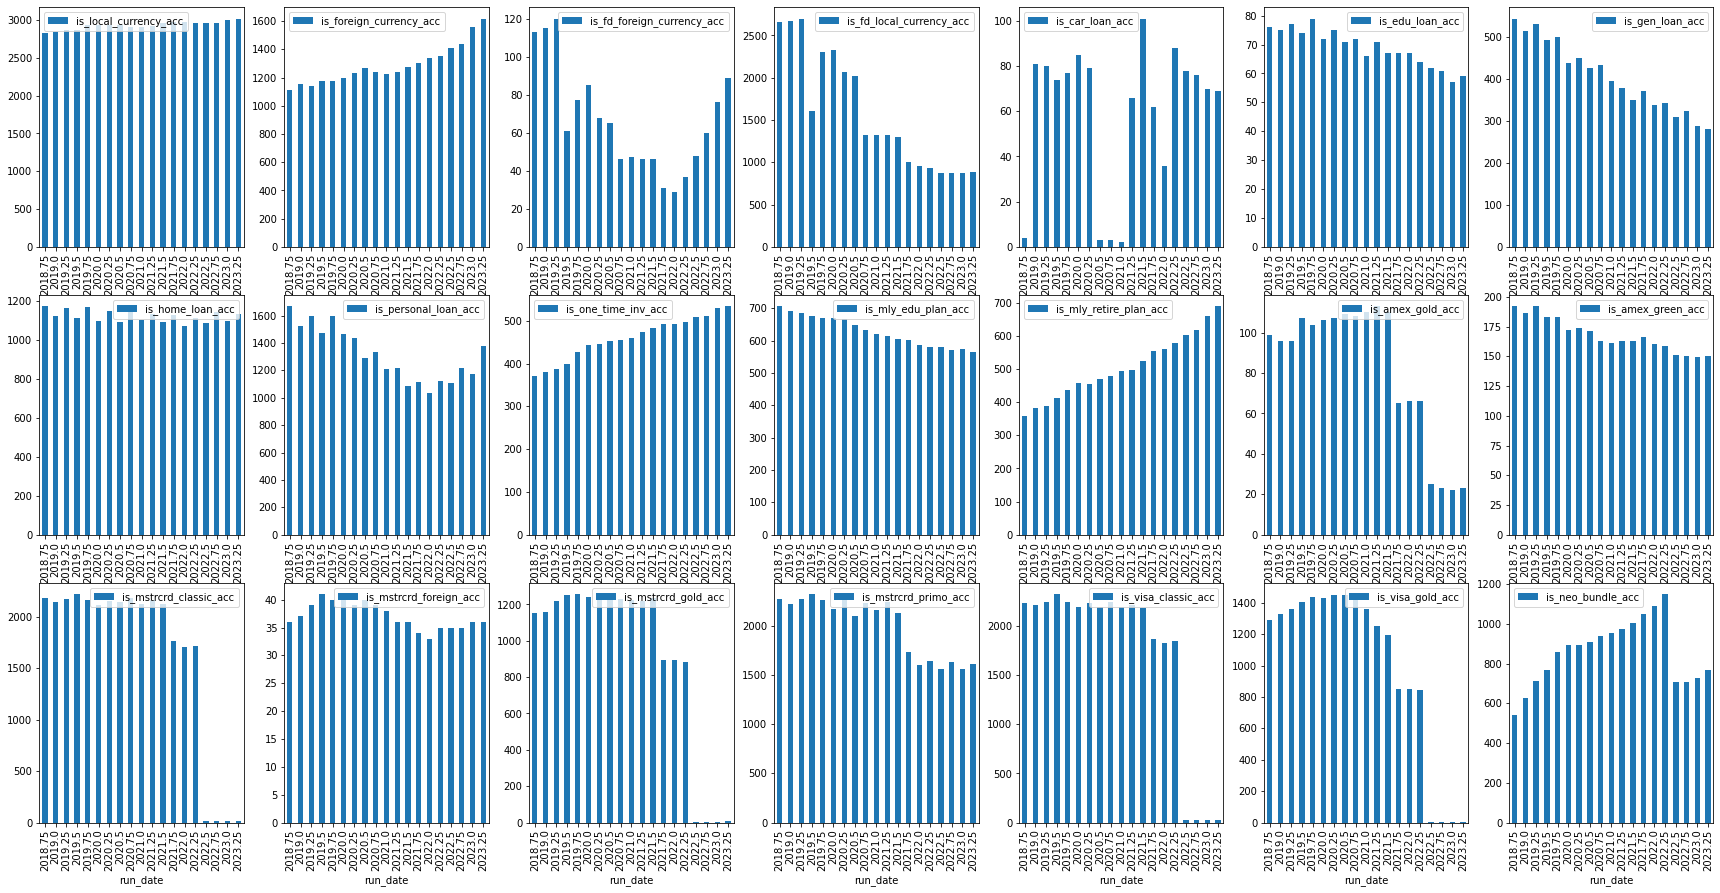

In [23]:
fig, axes = plt.subplots(figsize=(30,15),nrows=3, ncols=7)

data_eda_summary1.plot.bar(x='run_date', y='is_local_currency_acc', ax = axes[0,0])
data_eda_summary1.plot.bar(x='run_date', y='is_foreign_currency_acc',ax = axes[0,1])
data_eda_summary1.plot.bar(x='run_date', y='is_fd_foreign_currency_acc', ax = axes[0,2])
data_eda_summary1.plot.bar(x='run_date', y='is_fd_local_currency_acc',ax = axes[0,3])
data_eda_summary1.plot.bar(x='run_date', y='is_car_loan_acc', ax = axes[0,4])
data_eda_summary1.plot.bar(x='run_date', y='is_edu_loan_acc',ax = axes[0,5])
data_eda_summary1.plot.bar(x='run_date', y='is_gen_loan_acc', ax = axes[0,6])


data_eda_summary1.plot.bar(x='run_date', y='is_home_loan_acc', ax = axes[1,0])
data_eda_summary1.plot.bar(x='run_date', y='is_personal_loan_acc',ax = axes[1,1])
data_eda_summary1.plot.bar(x='run_date', y='is_one_time_inv_acc', ax = axes[1,2])
data_eda_summary1.plot.bar(x='run_date', y='is_mly_edu_plan_acc',ax = axes[1,3])
data_eda_summary1.plot.bar(x='run_date', y='is_mly_retire_plan_acc',ax = axes[1,4])
data_eda_summary1.plot.bar(x='run_date', y='is_amex_gold_acc', ax = axes[1,5])
data_eda_summary1.plot.bar(x='run_date', y='is_amex_green_acc',ax = axes[1,6])

data_eda_summary1.plot.bar(x='run_date', y='is_mstrcrd_classic_acc', ax = axes[2,0])
data_eda_summary1.plot.bar(x='run_date', y='is_mstrcrd_foreign_acc', ax = axes[2,1])
data_eda_summary1.plot.bar(x='run_date', y='is_mstrcrd_gold_acc',ax = axes[2,2])
data_eda_summary1.plot.bar(x='run_date', y='is_mstrcrd_primo_acc', ax = axes[2,3])
data_eda_summary1.plot.bar(x='run_date', y='is_visa_classic_acc',ax = axes[2,4])
data_eda_summary1.plot.bar(x='run_date', y='is_visa_gold_acc', ax = axes[2,5])
data_eda_summary1.plot.bar(x='run_date', y='is_neo_bundle_acc',ax = axes[2,6])

In [24]:
data_eda_customers = data_eda_.groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2 = pd.merge(data_eda_summary1,data_eda_customers, how='inner', on='run_date').set_index('run_date')
data_eda_summary3 = pd.DataFrame()

for col in data_eda_summary2.columns:
    data_eda_summary3['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2[col]/data_eda_summary2['num_customers']),2)
    
data_eda_summary3 = data_eda_summary3.reset_index()

In [25]:
data_eda_summary3.head(2)

,run_date,perc_cust_local_currency_acc,perc_cust_foreign_currency_acc,perc_cust_fd_foreign_currency_acc,perc_cust_fd_local_currency_acc,perc_cust_car_loan_acc,perc_cust_edu_loan_acc,perc_cust_gen_loan_acc,perc_cust_home_loan_acc,perc_cust_personal_loan_acc,perc_cust_one_time_inv_acc,perc_cust_mly_edu_plan_acc,perc_cust_mly_retire_plan_acc,perc_cust_amex_gold_acc,perc_cust_amex_green_acc,perc_cust_mstrcrd_classic_acc,perc_cust_mstrcrd_foreign_acc,perc_cust_mstrcrd_gold_acc,perc_cust_mstrcrd_primo_acc,perc_cust_visa_classic_acc,perc_cust_visa_gold_acc,perc_cust_neo_bundle_acc,perc_cust__customers
0,2018.75,4.37,1.71,0.17,4.09,0.01,0.12,0.84,1.81,2.57,0.57,1.09,0.55,0.15,0.30,3.36,0.06,1.77,3.51,3.45,1.99,0.83,100.0
1,2019.00,4.34,1.76,0.18,4.07,0.12,0.11,0.79,1.72,2.33,0.58,1.06,0.58,0.15,0.28,3.27,0.06,1.77,3.40,3.39,2.03,0.96,100.0


<AxesSubplot:xlabel='run_date'>

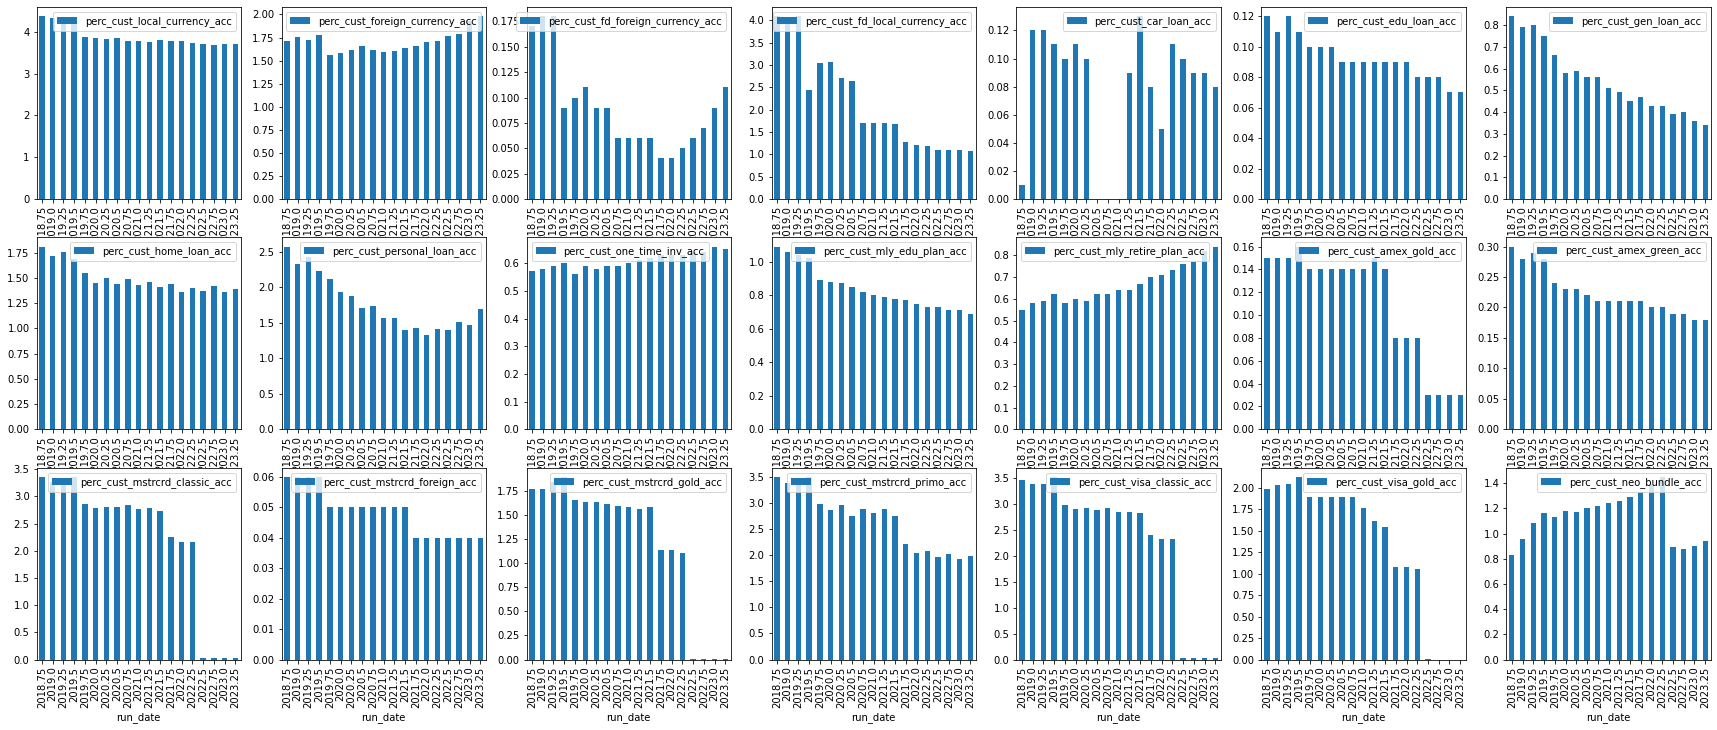

In [26]:
val = 'perc_cust'

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

data_eda_summary3.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
data_eda_summary3.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
data_eda_summary3.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
data_eda_summary3.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
data_eda_summary3.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
data_eda_summary3.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
data_eda_summary3.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


data_eda_summary3.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
data_eda_summary3.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
data_eda_summary3.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
data_eda_summary3.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
data_eda_summary3.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
data_eda_summary3.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
data_eda_summary3.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

data_eda_summary3.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
data_eda_summary3.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
data_eda_summary3.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
data_eda_summary3.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
data_eda_summary3.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
data_eda_summary3.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
data_eda_summary3.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

**Conclusion based on univariate analysis**


There has been an overall drop wrt percentage of active customers who tend to purchase products like :-
neo_bundle, visa_gold, visa_classic, mastercard_primo, mastercard_gold, mastercard_classic, amex_green, 
amex_gold, education_plan, home_loan, local_currency_acc, fixed_deposit_local_currency_acc, car_loan,
education_loan, general_loan ***over the last few quarters***

However, over recent time points, there has been an improvement in the percentages of customers who purchase retirement_plan_acc, foreign_currency_acc, fd_foreign_currency_acc, personal_loan_acc, one_time_investment_acc

##### Top products purchased by customers across time period

In [27]:
data_eda_summary4 = data_eda_summary3.iloc[:,:-1]
data_eda_summary5 = data_eda_summary4.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5['dense_rank'] = (data_eda_summary5.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

In [28]:
data_eda_summary6 = data_eda_summary5.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6 = data_eda_summary6[data_eda_summary6.dense_rank<=3]
data_eda_summary6['products_revised'] = data_eda_summary6.apply(lambda row : row['Products'][10:],axis=1)

In [29]:
data_eda_summary7 = data_eda_summary6.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7

,products_revised
run_date,
2018.75,local_currency_acc ++ fd_local_currency_acc ++ mstrcrd_primo_acc
2019.00,local_currency_acc ++ fd_local_currency_acc ++ mstrcrd_primo_acc
2019.25,local_currency_acc ++ fd_local_currency_acc ++ mstrcrd_primo_acc
2019.50,local_currency_acc ++ visa_classic_acc ++ mstrcrd_primo_acc
2019.75,local_currency_acc ++ fd_local_currency_acc ++ mstrcrd_primo_acc
2020.00,local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2020.25,local_currency_acc ++ mstrcrd_primo_acc ++ visa_classic_acc
2020.50,local_currency_acc ++ visa_classic_acc ++ mstrcrd_classic_acc
2020.75,local_currency_acc ++ visa_classic_acc ++ mstrcrd_primo_acc


In [30]:
data_eda_summary6[data_eda_summary6.run_date==2023][['products_revised','Perc_cust']]

,products_revised,Perc_cust
17,local_currency_acc,3.72
340,mstrcrd_primo_acc,1.94
36,foreign_currency_acc,1.93


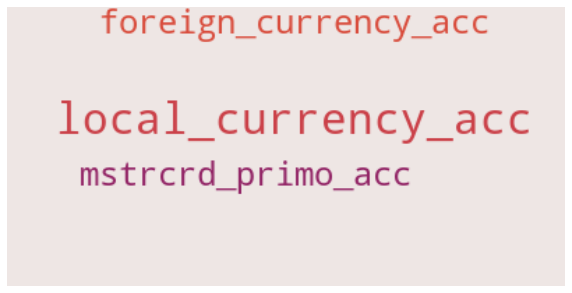

In [31]:
# method 1: convert to dict 
data_overall = dict(zip(data_eda_summary6[data_eda_summary6.run_date==2023][['products_revised','Perc_cust']]['products_revised'].tolist(), data_eda_summary6[data_eda_summary6.run_date==2023][['products_revised','Perc_cust']]['Perc_cust'].tolist()))

# method 2: convert to dict
data_overall = data_eda_summary6[data_eda_summary6.run_date==2023][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
#!pip install --upgrade pip

#!pip install --upgrade Pillow

In [33]:
#data_overall

In [34]:
#from wordcloud import WordCloud

**Conclusion based on top 3 products purchased based on percentage of customers who purchase**

Although top product that customers seem to buy is a local currency account over the time period since 2018, however in recent years customers show a higher likelihood of purchase of products like :- foreign currency account , mastercard primo account and personal loan. Visa classic used to be one of the top product choices of customers till early 2022.

# Bivariate Analysis

### Based on `Marketing Segment`

In [35]:
data_eda_ms = data_eda[['run_date','market_segment','cust_number','is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']]

In [36]:
data_eda_ms.groupby('market_segment')['cust_number'].nunique()

market_segment
ICPS Staff Segment A                 6
ICPS Staff Segment B                 5
MASS                             65568
MASS AFFLUENT                     5025
MCB INTERNATIONAL                  637
MCB SELECT                         710
MCB SELECT INTERNATIONAL           529
PRIVATE BANKING                    508
PRIVATE BANKING INTERNATIONAL      242
PRIVATE BANKING LOCAL              228
Rupys 0-12                        6449
Rupys 13-17                       5606
SEGMENT 18-25                    16101
Name: cust_number, dtype: int64

#### SEGMENT 18-25

In [37]:
data_eda_ms1 = data_eda_ms[data_eda_ms.market_segment=='SEGMENT 18-25'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

In [38]:
data_eda_customers_ms1 = data_eda_ms[data_eda_ms.market_segment=='SEGMENT 18-25'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_ms1 = pd.merge(data_eda_ms1,data_eda_customers_ms1, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_ms1 = pd.DataFrame()

for col in data_eda_summary2_ms1.columns:
    data_eda_summary3_ms1['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_ms1[col]/data_eda_summary2_ms1['num_customers']),2)
    
data_eda_summary3_ms1 = data_eda_summary3_ms1.reset_index()    

<AxesSubplot:xlabel='run_date'>

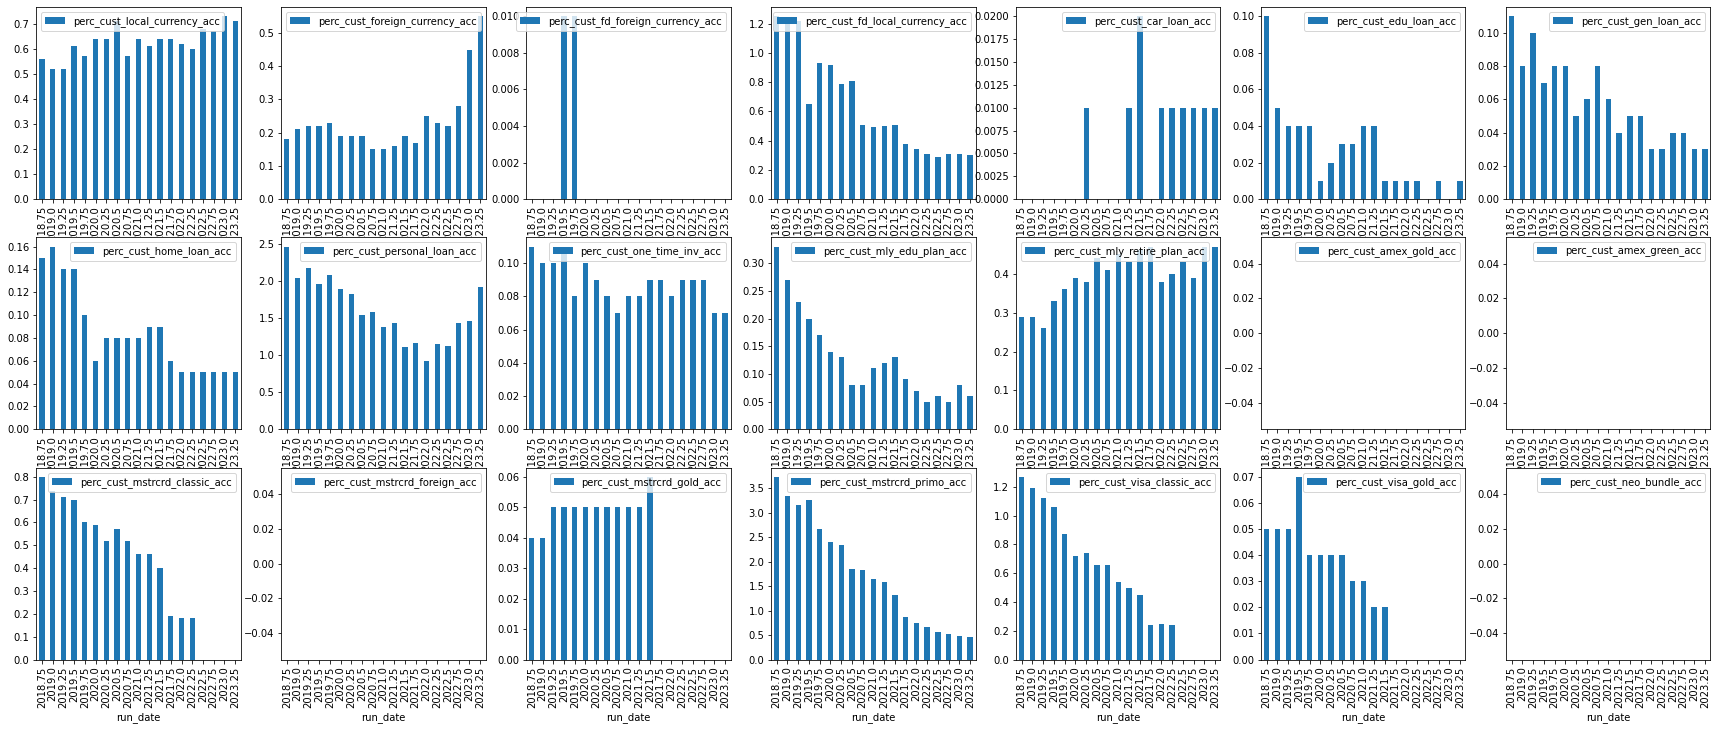

In [39]:
val = 'perc_cust'
df = data_eda_summary3_ms1

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [40]:
data_eda_summary4_ms1 = data_eda_summary3_ms1.iloc[:,:-1]
data_eda_summary5_ms1 = data_eda_summary4_ms1.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_ms1['dense_rank'] = (data_eda_summary5_ms1.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_ms1 = data_eda_summary5_ms1.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_ms1 = data_eda_summary6_ms1[data_eda_summary6_ms1.dense_rank<=3]
data_eda_summary6_ms1['products_revised'] = data_eda_summary6_ms1.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_ms1 = data_eda_summary6_ms1.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_ms1

,products_revised
run_date,
2018.75,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc
2019.00,mstrcrd_primo_acc ++ personal_loan_acc ++ fd_local_currency_acc
2019.25,mstrcrd_primo_acc ++ personal_loan_acc ++ fd_local_currency_acc
2019.50,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc
2019.75,mstrcrd_primo_acc ++ personal_loan_acc ++ fd_local_currency_acc
2020.00,mstrcrd_primo_acc ++ personal_loan_acc ++ fd_local_currency_acc
2020.25,mstrcrd_primo_acc ++ personal_loan_acc ++ fd_local_currency_acc
2020.50,mstrcrd_primo_acc ++ personal_loan_acc ++ fd_local_currency_acc
2020.75,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc


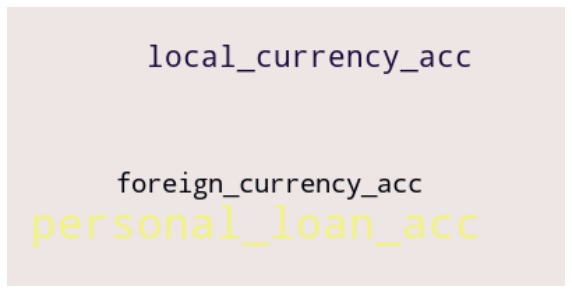

In [41]:
period=2023.25

# convert to dict
data_eda_summary6_ms1_overall = data_eda_summary6_ms1[data_eda_summary6_ms1.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms1_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms1_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms1_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

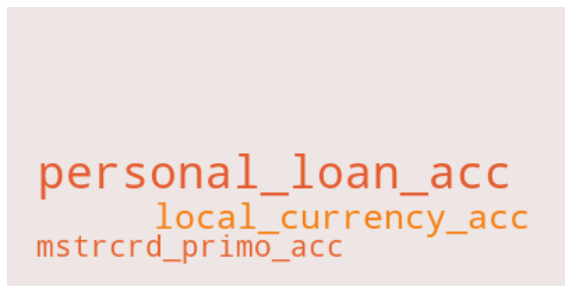

In [42]:
period=2023

# convert to dict
data_eda_summary6_ms1_overall = data_eda_summary6_ms1[data_eda_summary6_ms1.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms1_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms1_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms1_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

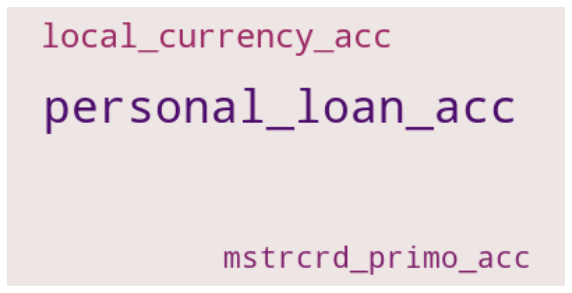

In [43]:
period=2022.75

# convert to dict
data_eda_summary6_ms1_overall = data_eda_summary6_ms1[data_eda_summary6_ms1.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms1_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms1_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms1_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion based on top 3 products based on percentage of customers who purchase those from the marketing segment :- `Segment 18 to 25`**

`Personal_loan` has always been one of the top products that these segment of customers had bought since 2018 , alongside `mastercard_primo_account`, `visa_classic_account` and `fixed_deposit_local_currency_account`.
However, in recent years customers show a highlikelihood of purchase of products
like :- `foreign currency account` , `local currency account` and `personal loan`. 

`mastercard_primo_account` used to be one of the top product choices of customers till the end of 2022.

#### MASS

In [44]:
data_eda_ms2 = data_eda_ms[data_eda_ms.market_segment=='MASS'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

In [45]:
data_eda_customers_ms2 = data_eda_ms[data_eda_ms.market_segment=='MASS'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_ms2 = pd.merge(data_eda_ms2,data_eda_customers_ms2, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_ms2 = pd.DataFrame()

for col in data_eda_summary2_ms2.columns:
    data_eda_summary3_ms2['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_ms2[col]/data_eda_summary2_ms2['num_customers']),2)
    
data_eda_summary3_ms2 = data_eda_summary3_ms2.reset_index()

<AxesSubplot:xlabel='run_date'>

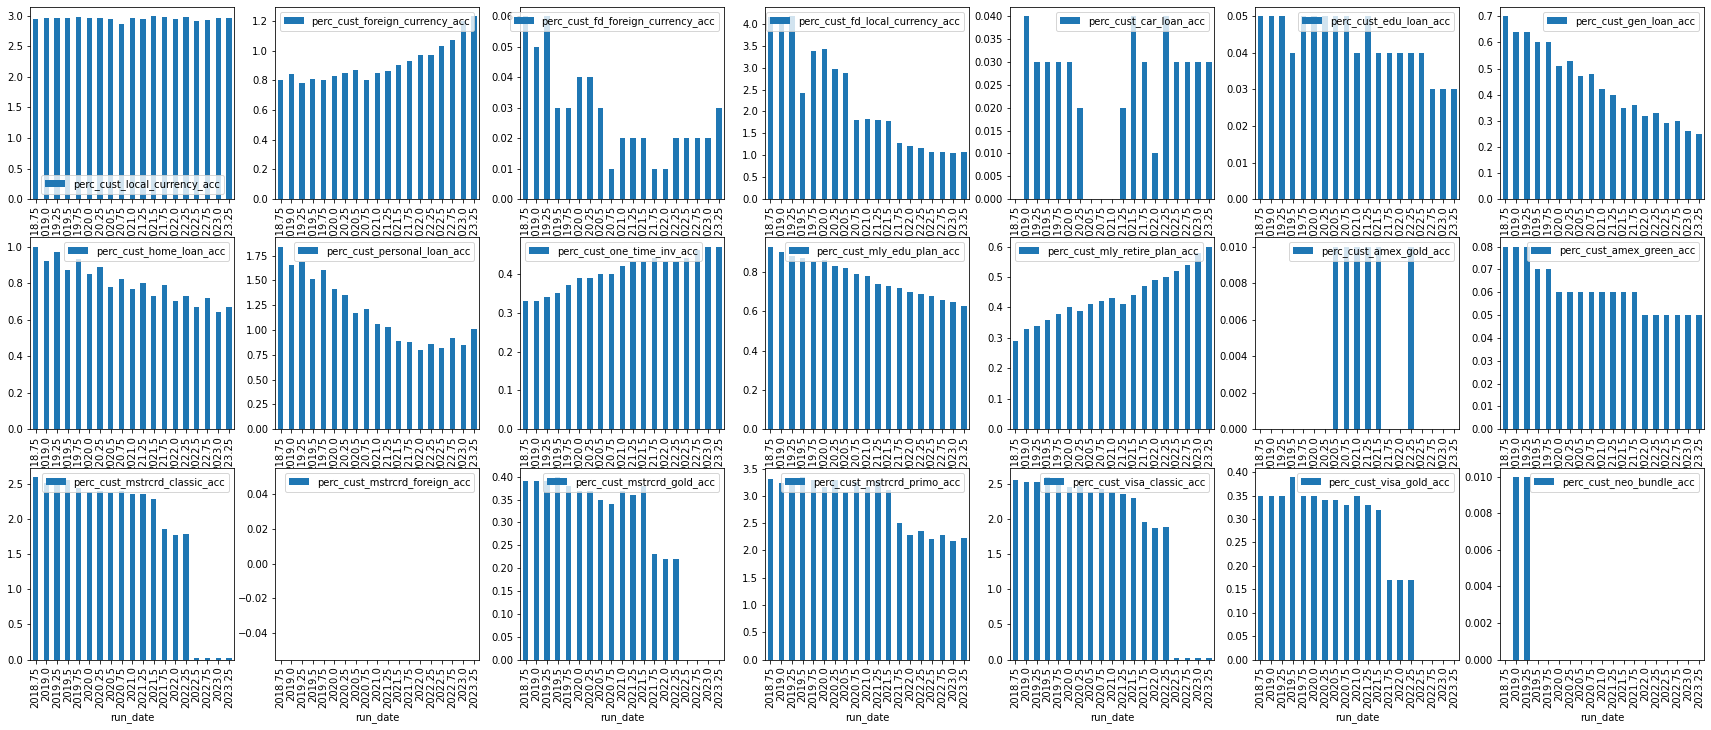

In [46]:
val = 'perc_cust'
df = data_eda_summary3_ms2

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [47]:
data_eda_summary4_ms2 = data_eda_summary3_ms2.iloc[:,:-1]
data_eda_summary5_ms2 = data_eda_summary4_ms2.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_ms2['dense_rank'] = (data_eda_summary5_ms2.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_ms2 = data_eda_summary5_ms2.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_ms2 = data_eda_summary6_ms2[data_eda_summary6_ms2.dense_rank<=3]
data_eda_summary6_ms2['products_revised'] = data_eda_summary6_ms2.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_ms2 = data_eda_summary6_ms2.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_ms2

,products_revised
run_date,
2018.75,fd_local_currency_acc ++ mstrcrd_primo_acc ++ local_currency_acc
2019.00,fd_local_currency_acc ++ mstrcrd_primo_acc ++ local_currency_acc
2019.25,fd_local_currency_acc ++ mstrcrd_primo_acc ++ local_currency_acc
2019.50,mstrcrd_primo_acc ++ local_currency_acc ++ visa_classic_acc
2019.75,fd_local_currency_acc ++ mstrcrd_primo_acc ++ local_currency_acc
2020.00,fd_local_currency_acc ++ mstrcrd_primo_acc ++ local_currency_acc
2020.25,mstrcrd_primo_acc ++ local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2020.50,mstrcrd_primo_acc ++ local_currency_acc ++ fd_local_currency_acc
2020.75,mstrcrd_primo_acc ++ local_currency_acc ++ visa_classic_acc


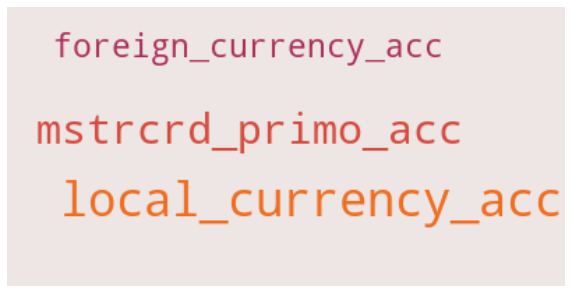

In [48]:
period=2023.25

# convert to dict
data_eda_summary6_ms2_overall = data_eda_summary6_ms2[data_eda_summary6_ms2.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms2_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms2_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms2_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

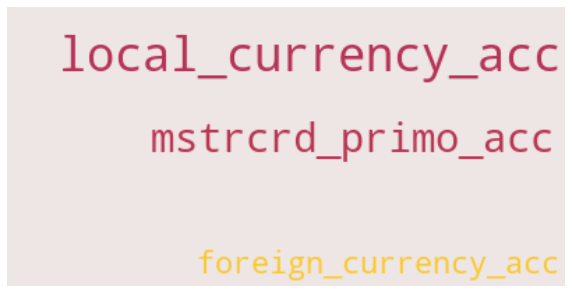

In [49]:
period=2023

# convert to dict
data_eda_summary6_ms2_overall = data_eda_summary6_ms2[data_eda_summary6_ms2.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms2_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms2_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms2_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

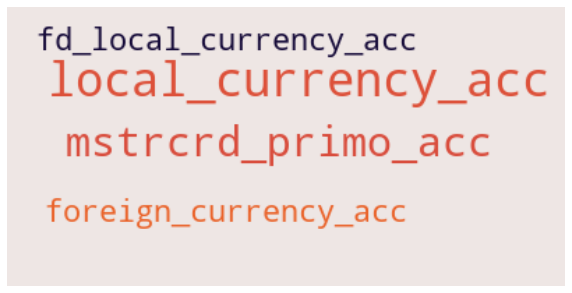

In [50]:
period=2022.75

# convert to dict
data_eda_summary6_ms2_overall = data_eda_summary6_ms2[data_eda_summary6_ms2.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms2_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms2_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms2_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion based on top 3 products based on percentage of customers who purchase those from the marketing segment :- `MASS`**

`local_currency_account` and `mastercard_primo_account` has always been the top products that these segment of customers had bought since 2018 , alongside `visa_classic_account` and `fixed_deposit_local_currency_account`.

However, in recent years customers show a highlikelihood of purchase of products
like :- `local currency account`, `foreign currency account` , and `mastercard_primo_account`. 

`fixed_deposit_local_currency_account` used to be one of the top product choices of customers till the end of 2022.

#### MASS AFFLUENT

In [51]:
data_eda_ms3 = data_eda_ms[data_eda_ms.market_segment=='MASS AFFLUENT'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

data_eda_customers_ms3 = data_eda_ms[data_eda_ms.market_segment=='MASS AFFLUENT'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_ms3 = pd.merge(data_eda_ms3,data_eda_customers_ms3, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_ms3 = pd.DataFrame()

In [52]:
for col in data_eda_summary2_ms3.columns:
    data_eda_summary3_ms3['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_ms3[col]/data_eda_summary2_ms3['num_customers']),2)
    
data_eda_summary3_ms3 = data_eda_summary3_ms3.reset_index()

<AxesSubplot:xlabel='run_date'>

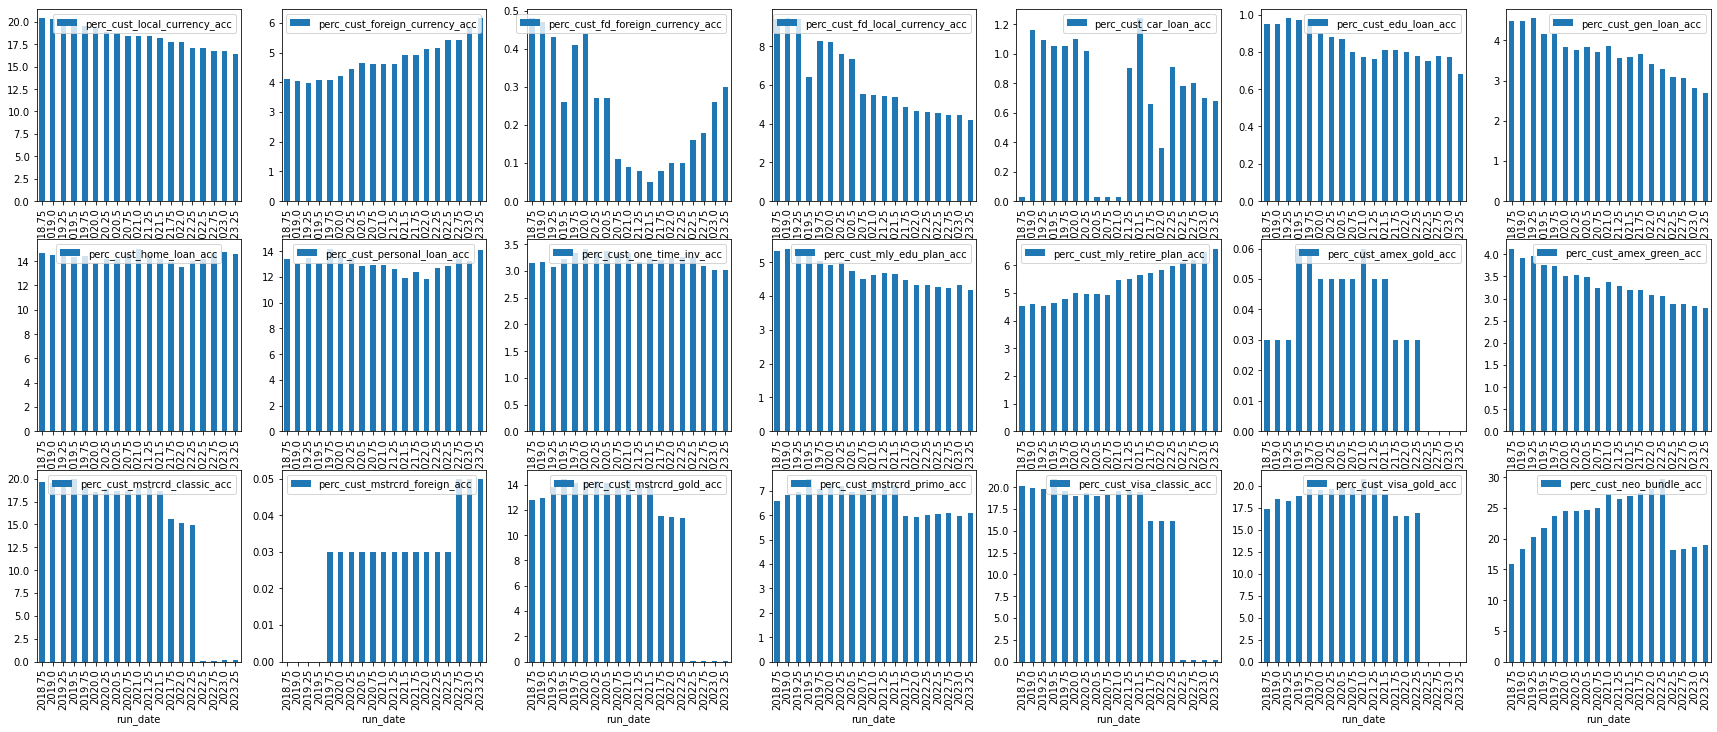

In [53]:
val = 'perc_cust'
df = data_eda_summary3_ms3

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [54]:
data_eda_summary4_ms3 = data_eda_summary3_ms3.iloc[:,:-1]
data_eda_summary5_ms3 = data_eda_summary4_ms3.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_ms3['dense_rank'] = (data_eda_summary5_ms3.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_ms3 = data_eda_summary5_ms3.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_ms3 = data_eda_summary6_ms3[data_eda_summary6_ms3.dense_rank<=3]
data_eda_summary6_ms3['products_revised'] = data_eda_summary6_ms3.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_ms3 = data_eda_summary6_ms3.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_ms3

,products_revised
run_date,
2018.75,local_currency_acc ++ visa_classic_acc ++ mstrcrd_classic_acc
2019.00,local_currency_acc ++ visa_classic_acc ++ mstrcrd_classic_acc
2019.25,neo_bundle_acc ++ visa_classic_acc ++ local_currency_acc
2019.50,neo_bundle_acc ++ visa_classic_acc ++ mstrcrd_classic_acc
2019.75,neo_bundle_acc ++ visa_gold_acc ++ local_currency_acc
2020.00,neo_bundle_acc ++ visa_gold_acc ++ local_currency_acc
2020.25,neo_bundle_acc ++ visa_gold_acc ++ visa_classic_acc
2020.50,neo_bundle_acc ++ visa_gold_acc ++ visa_classic_acc
2020.75,neo_bundle_acc ++ visa_gold_acc ++ visa_classic_acc


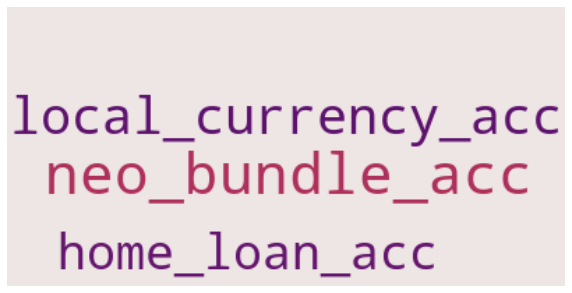

In [55]:
period=2023.25

# convert to dict
data_eda_summary6_ms3_overall = data_eda_summary6_ms3[data_eda_summary6_ms3.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms3_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms3_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms3_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

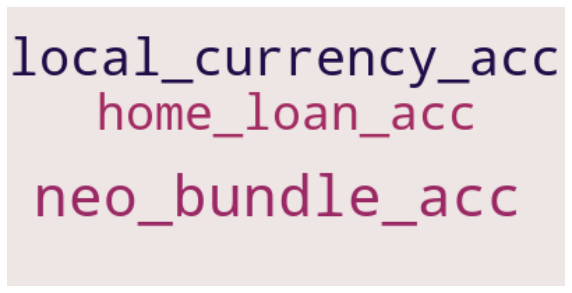

In [56]:
period=2023

# convert to dict
data_eda_summary6_ms3_overall = data_eda_summary6_ms3[data_eda_summary6_ms3.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms3_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms3_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms3_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

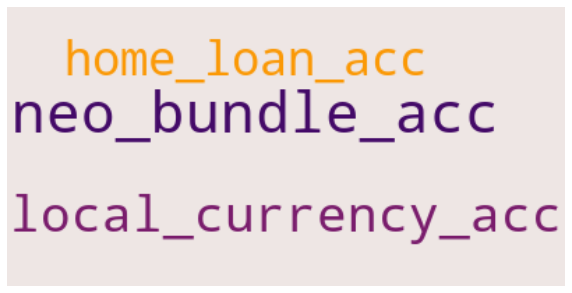

In [57]:
period=2022.75

# convert to dict
data_eda_summary6_ms3_overall = data_eda_summary6_ms3[data_eda_summary6_ms3.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms3_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms3_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms3_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion based on top 3 products based on percentage of customers who purchase those from the marketing segment :- `MASS`**

In recent years customers show a highlikelihood of purchase of products
like :- `neo_bundle_acc`, `local_currency_acc` , and `home_loan_acc`. 

`visa_gold_acc` used to be one of the top product choices of customers till the early 2022.

### Rupys 0-12

<AxesSubplot:xlabel='run_date'>

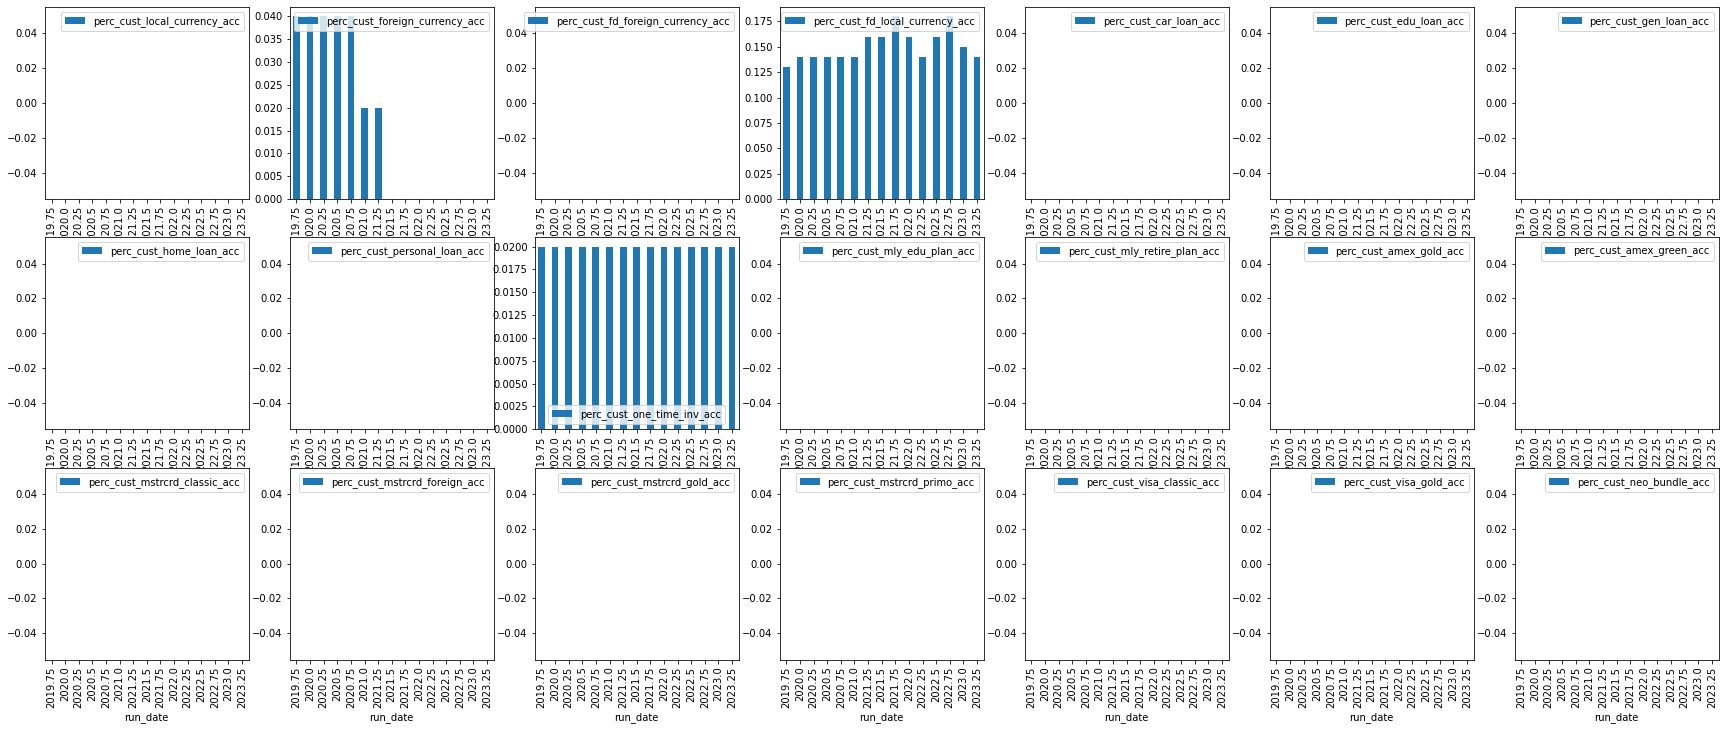

In [58]:
data_eda_ms4 = data_eda_ms[data_eda_ms.market_segment=='Rupys 0-12'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

data_eda_customers_ms4 = data_eda_ms[data_eda_ms.market_segment=='Rupys 0-12'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_ms4 = pd.merge(data_eda_ms4,data_eda_customers_ms4, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_ms4 = pd.DataFrame()

for col in data_eda_summary2_ms4.columns:
    data_eda_summary3_ms4['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_ms4[col]/data_eda_summary2_ms4['num_customers']),2)
    
data_eda_summary3_ms4 = data_eda_summary3_ms4.reset_index()    

val = 'perc_cust'
df = data_eda_summary3_ms4

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [59]:
data_eda_summary4_ms4 = data_eda_summary3_ms4.iloc[:,:-1]
data_eda_summary5_ms4 = data_eda_summary4_ms4.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_ms4['dense_rank'] = (data_eda_summary5_ms4.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_ms4 = data_eda_summary5_ms4.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_ms4 = data_eda_summary6_ms4[data_eda_summary6_ms4.dense_rank<=3]
data_eda_summary6_ms4['products_revised'] = data_eda_summary6_ms4.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_ms4 = data_eda_summary6_ms4.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_ms4

,products_revised
run_date,
2019.75,fd_local_currency_acc ++ foreign_currency_acc ++ one_time_inv_acc
2020.00,fd_local_currency_acc ++ foreign_currency_acc ++ one_time_inv_acc
2020.25,fd_local_currency_acc ++ foreign_currency_acc ++ one_time_inv_acc
2020.50,fd_local_currency_acc ++ foreign_currency_acc ++ one_time_inv_acc
2020.75,fd_local_currency_acc ++ foreign_currency_acc ++ one_time_inv_acc
2021.00,fd_local_currency_acc ++ foreign_currency_acc ++ one_time_inv_acc ++ local_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_classic_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2021.25,fd_local_currency_acc ++ foreign_currency_acc ++ one_time_inv_acc ++ local_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_classic_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2021.50,fd_local_currency_acc ++ one_time_inv_acc ++ local_currency_acc ++ foreign_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_classic_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2021.75,fd_local_currency_acc ++ one_time_inv_acc ++ local_currency_acc ++ foreign_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_classic_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc


**Conclusion based on top 3 products based on percentage of customers who purchase those from the marketing segment :- `Rupys 0-12`**

In recent years customers show a highlikelihood of purchase of products
like :- `fd_local_currency_acc`and `one_time_inv_acc`

`foreign_currency_acc` used to be one of the top product choices of customers till the early 2021.

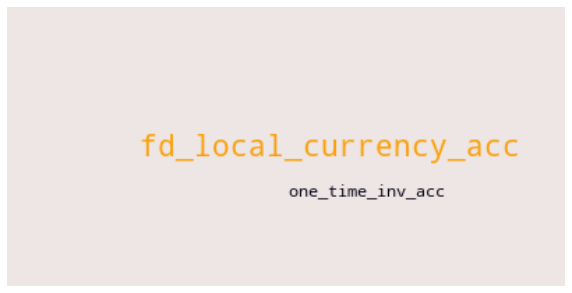

In [60]:
period=2023.25

# convert to dict
data_eda_summary6_ms4_overall = data_eda_summary6_ms4[data_eda_summary6_ms4.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms4_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms4_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms4_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

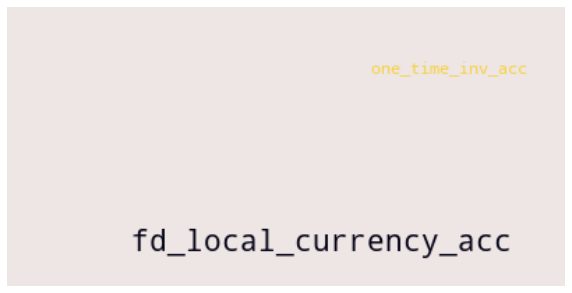

In [61]:
period=2023

# convert to dict
data_eda_summary6_ms4_overall = data_eda_summary6_ms4[data_eda_summary6_ms4.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms4_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms4_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms4_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

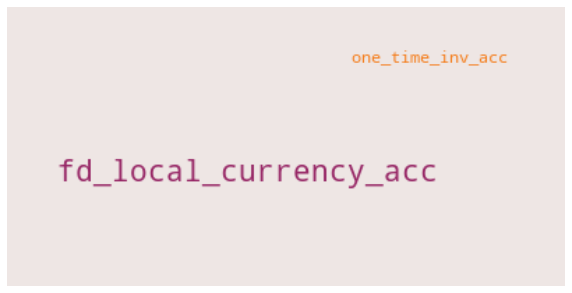

In [62]:
period=2022.75

# convert to dict
data_eda_summary6_ms4_overall = data_eda_summary6_ms4[data_eda_summary6_ms4.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms4_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms4_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms4_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

### Rupys 13-17

<AxesSubplot:xlabel='run_date'>

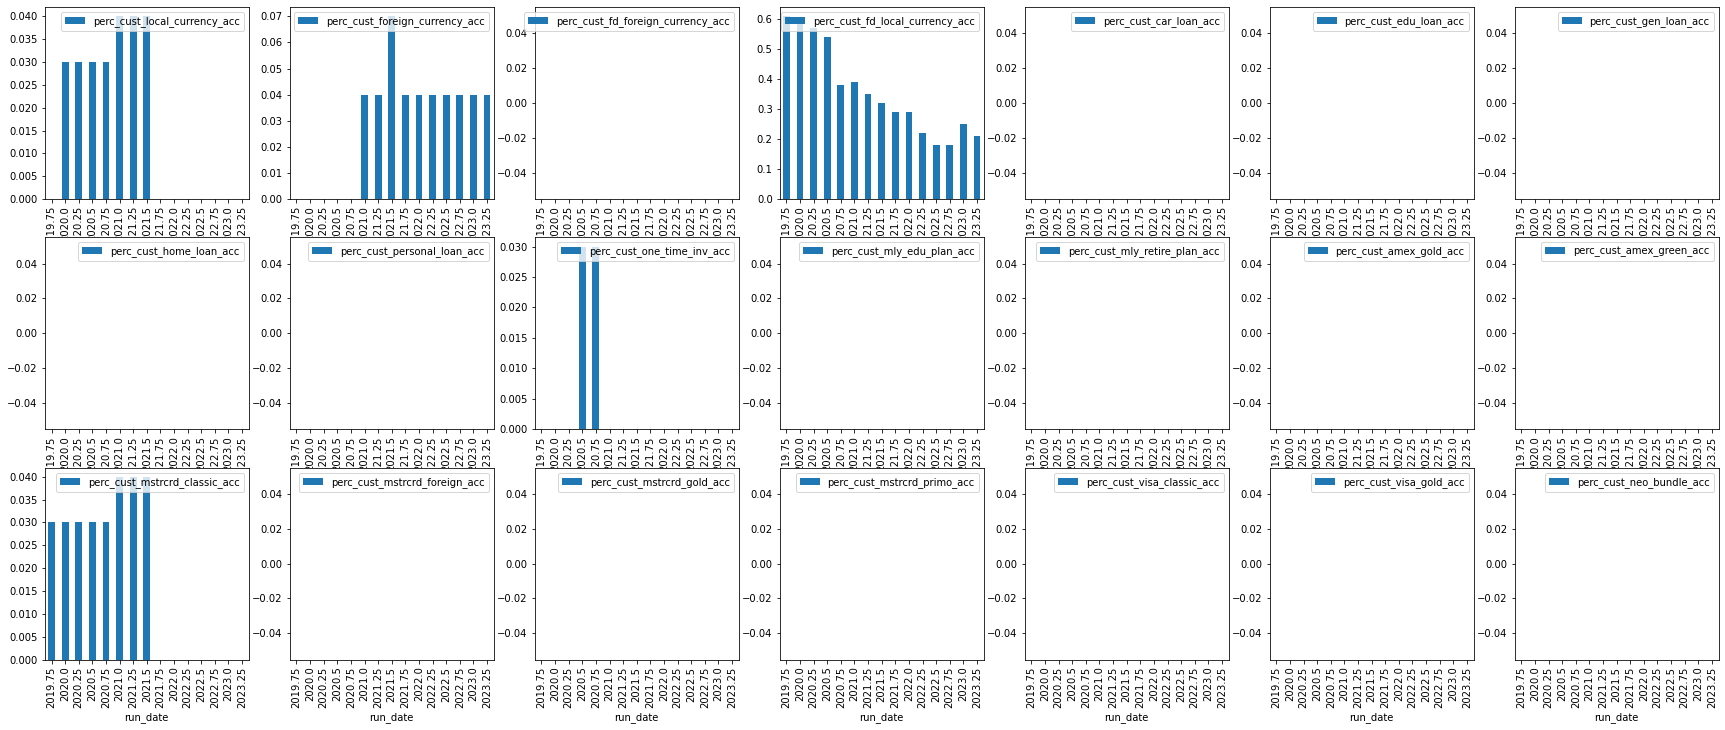

In [63]:
data_eda_ms6 = data_eda_ms[data_eda_ms.market_segment=='Rupys 13-17'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

data_eda_customers_ms6 = data_eda_ms[data_eda_ms.market_segment=='Rupys 13-17'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_ms6 = pd.merge(data_eda_ms6,data_eda_customers_ms6, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_ms6 = pd.DataFrame()

for col in data_eda_summary2_ms6.columns:
    data_eda_summary3_ms6['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_ms6[col]/data_eda_summary2_ms6['num_customers']),2)
    
data_eda_summary3_ms6 = data_eda_summary3_ms6.reset_index()    

val = 'perc_cust'
df = data_eda_summary3_ms6

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [64]:
data_eda_summary4_ms5 = data_eda_summary3_ms6.iloc[:,:-1]
data_eda_summary5_ms5 = data_eda_summary4_ms5.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_ms5['dense_rank'] = (data_eda_summary5_ms5.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_ms5 = data_eda_summary5_ms5.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_ms5 = data_eda_summary6_ms5[data_eda_summary6_ms5.dense_rank<=3]
data_eda_summary6_ms5['products_revised'] = data_eda_summary6_ms5.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_ms5 = data_eda_summary6_ms5.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_ms5

,products_revised
run_date,
2019.75,fd_local_currency_acc ++ mstrcrd_classic_acc ++ local_currency_acc ++ foreign_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ one_time_inv_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2020.00,fd_local_currency_acc ++ local_currency_acc ++ mstrcrd_classic_acc ++ foreign_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ one_time_inv_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2020.25,fd_local_currency_acc ++ local_currency_acc ++ mstrcrd_classic_acc ++ foreign_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ one_time_inv_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2020.50,fd_local_currency_acc ++ local_currency_acc ++ one_time_inv_acc ++ mstrcrd_classic_acc ++ foreign_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2020.75,fd_local_currency_acc ++ local_currency_acc ++ one_time_inv_acc ++ mstrcrd_classic_acc ++ foreign_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2021.00,fd_local_currency_acc ++ local_currency_acc ++ foreign_currency_acc ++ mstrcrd_classic_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ one_time_inv_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2021.25,fd_local_currency_acc ++ local_currency_acc ++ foreign_currency_acc ++ mstrcrd_classic_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ one_time_inv_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc
2021.50,fd_local_currency_acc ++ foreign_currency_acc ++ local_currency_acc ++ mstrcrd_classic_acc
2021.75,fd_local_currency_acc ++ foreign_currency_acc ++ local_currency_acc ++ fd_foreign_currency_acc ++ car_loan_acc ++ edu_loan_acc ++ gen_loan_acc ++ home_loan_acc ++ personal_loan_acc ++ one_time_inv_acc ++ mly_edu_plan_acc ++ mly_retire_plan_acc ++ amex_gold_acc ++ amex_green_acc ++ mstrcrd_classic_acc ++ mstrcrd_foreign_acc ++ mstrcrd_gold_acc ++ mstrcrd_primo_acc ++ visa_classic_acc ++ visa_gold_acc ++ neo_bundle_acc


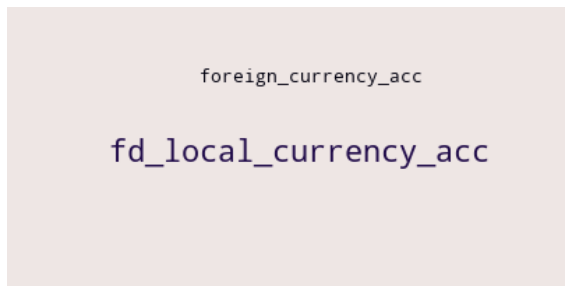

In [65]:
period=2023.25

# convert to dict
data_eda_summary6_ms5_overall = data_eda_summary6_ms5[data_eda_summary6_ms5.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms5_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms5_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms5_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

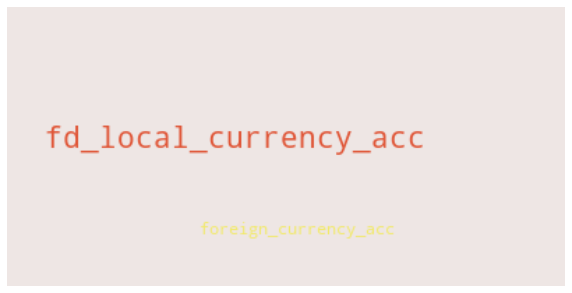

In [66]:
period=2023

# convert to dict
data_eda_summary6_ms5_overall = data_eda_summary6_ms5[data_eda_summary6_ms5.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms5_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms5_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms5_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

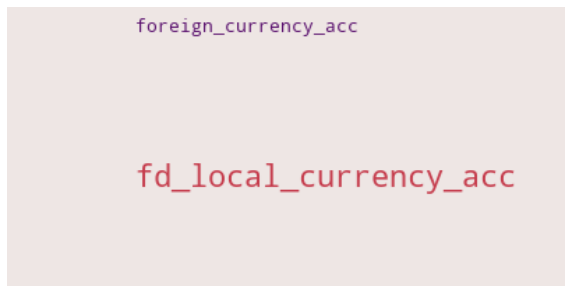

In [67]:
period=2022.75

# convert to dict
data_eda_summary6_ms5_overall = data_eda_summary6_ms5[data_eda_summary6_ms5.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_ms5_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_ms5_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_ms5_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion based on top 3 products based on percentage of customers who purchase those from the marketing segment :- `Rupys 13-17`**

In recent years customers show a highlikelihood of purchase of products
like :- `fd_local_currency_acc`and `foreign_currency_acc`

`mstrcrd_classic_acc` used to be one of the top product choices of customers till the middle of 2021.

**Conclusion**

***a.*** In the last few quarters , although `SEGMENT 18-25` and `MASS AFFLUENT` segments show a decrease in the percentage of customers opening an investment account, the picture for `MASS` looks promising.

***b.*** In the last few quarters , people belonging to `MASS AFFLUENT` segment are opening mastercard foreign account relatively in higher numbers whereas people belonging to `MASS` and `SEGMENT 18-25` are yet to open any such accounts

***c.*** In the last few quarters, there has been a relative decrease wrt the percentage of customers apurchasing HOME LOAN for people in marketing segments : `SEGMENT 18-25` and `MASS` whereas for `MASS AFFLUENT` population the picture has not changed much over the last three quarters

At an overall level, across segments we see a promising growth wrt relative number of customers who purchase "Retirement planning accounts" and "Personal loan accounts" but in other product areas a de-growth is observed.


### Based on `current savings balance`

In [68]:
data_eda_balance = data_eda[['run_date','curr_sav_balance','cust_number','is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']]

In [69]:
# jj = data_eda_balance[data_eda_balance['curr_sav_balance']>0]['curr_sav_balance'].sort_values(ascending=True)
# jj.head()

In [70]:
pd.qcut(data_eda_balance['curr_sav_balance'],3)[:3]

0    (41606.007, 447509539.574]
1    (41606.007, 447509539.574]
2    (41606.007, 447509539.574]
Name: curr_sav_balance, dtype: category
Categories (3, interval[float64, right]): [(0.009000000000000001, 2415.493] < (2415.493, 41606.007] < (41606.007, 447509539.574]]

In [71]:
data_eda_balance['curr_sav_balance_band'] = data_eda_balance.apply(lambda row: 'Less than 2.5k' if row['curr_sav_balance']<2500 else '2.5k to 50k' if ((row['curr_sav_balance']>=2500) & (row['curr_sav_balance']<50000)) else '50k+',axis=1)

In [72]:
data_eda_balance[['curr_sav_balance_band']].value_counts()

curr_sav_balance_band
2.5k to 50k              505282
Less than 2.5k           481692
50k+                     448285
dtype: int64

### Saving balance : Less than 2.5k

In [73]:
data_eda_balseg1 = data_eda_balance[data_eda_balance.curr_sav_balance_band=='Less than 2.5k'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

data_eda_customers_balseg1 = data_eda_balance[data_eda_balance.curr_sav_balance_band=='Less than 2.5k'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_balseg1 = pd.merge(data_eda_balseg1,data_eda_customers_balseg1, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_balseg1 = pd.DataFrame()

In [74]:
for col in data_eda_summary2_balseg1.columns:
    data_eda_summary3_balseg1['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_balseg1[col]/data_eda_summary2_balseg1['num_customers']),2)
    
data_eda_summary3_balseg1 = data_eda_summary3_balseg1.reset_index()

<AxesSubplot:xlabel='run_date'>

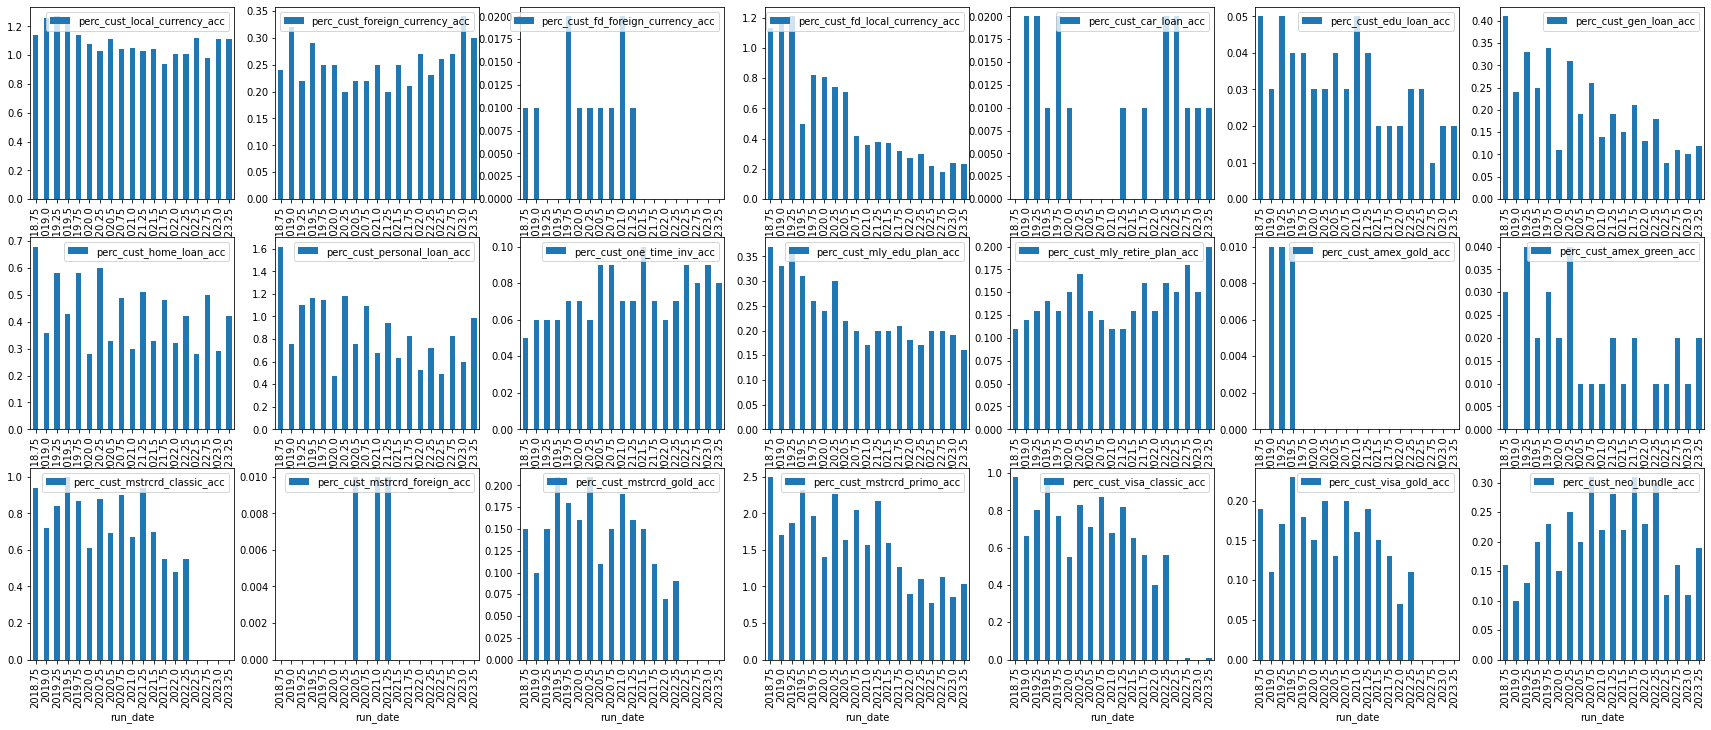

In [75]:
val = 'perc_cust'
df = data_eda_summary3_balseg1

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [76]:
data_eda_summary4_bs1 = data_eda_summary3_balseg1.iloc[:,:-1]
data_eda_summary5_bs1 = data_eda_summary4_bs1.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_bs1['dense_rank'] = (data_eda_summary5_bs1.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_bs1 = data_eda_summary5_bs1.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_bs1 = data_eda_summary6_bs1[data_eda_summary6_bs1.dense_rank<=3]
data_eda_summary6_bs1['products_revised'] = data_eda_summary6_bs1.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_bs1 = data_eda_summary6_bs1.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_bs1

,products_revised
run_date,
2018.75,mstrcrd_primo_acc ++ personal_loan_acc ++ local_currency_acc
2019.00,mstrcrd_primo_acc ++ local_currency_acc ++ fd_local_currency_acc
2019.25,mstrcrd_primo_acc ++ local_currency_acc ++ fd_local_currency_acc
2019.50,mstrcrd_primo_acc ++ local_currency_acc ++ personal_loan_acc
2019.75,mstrcrd_primo_acc ++ personal_loan_acc ++ local_currency_acc
2020.00,mstrcrd_primo_acc ++ local_currency_acc ++ fd_local_currency_acc
2020.25,mstrcrd_primo_acc ++ personal_loan_acc ++ local_currency_acc
2020.50,mstrcrd_primo_acc ++ local_currency_acc ++ personal_loan_acc
2020.75,mstrcrd_primo_acc ++ personal_loan_acc ++ local_currency_acc


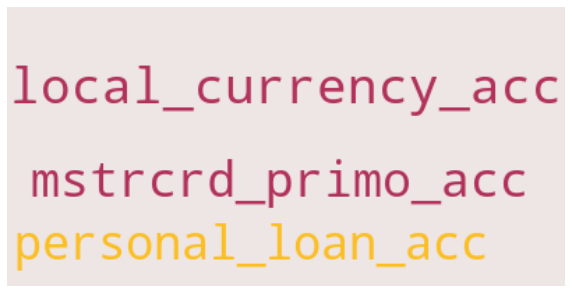

In [77]:
period=2023.25

# convert to dict
data_eda_summary6_bs1_overall = data_eda_summary6_bs1[data_eda_summary6_bs1.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs1_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs1_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs1_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

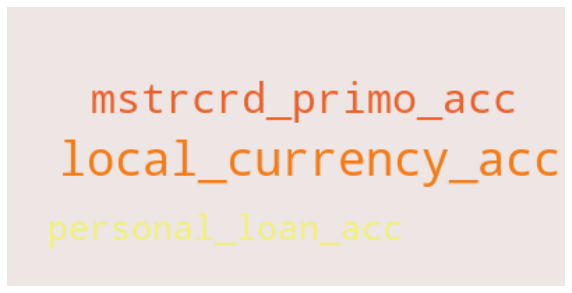

In [78]:
period=2023

# convert to dict
data_eda_summary6_bs1_overall = data_eda_summary6_bs1[data_eda_summary6_bs1.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs1_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs1_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs1_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

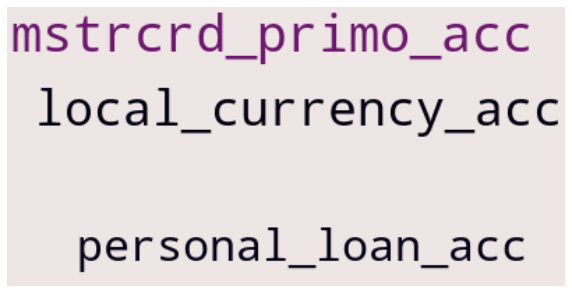

In [79]:
period=2022.75

# convert to dict
data_eda_summary6_bs1_overall = data_eda_summary6_bs1[data_eda_summary6_bs1.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs1_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs1_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs1_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion based on top 3 products based on percentage of customers who purchase those from the `savings balance segment of less than 2.5k`**

In recent years customers show a highlikelihood of purchase of products
like :- `local_currency_acc`,`mstrcrd_primo_acc` and `personal_loan_acc`

### Saving balance : 2.5k to 50k

In [80]:
data_eda_balseg2 = data_eda_balance[data_eda_balance.curr_sav_balance_band=='2.5k to 50k'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

data_eda_customers_balseg2 = data_eda_balance[data_eda_balance.curr_sav_balance_band=='2.5k to 50k'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_balseg2 = pd.merge(data_eda_balseg2,data_eda_customers_balseg2, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_balseg2 = pd.DataFrame()

In [81]:
data_eda_summary2_balseg2.head(2)

,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_classic_acc,is_mstrcrd_foreign_acc,is_mstrcrd_gold_acc,is_mstrcrd_primo_acc,is_visa_classic_acc,is_visa_gold_acc,is_neo_bundle_acc,num_customers
run_date,,,,,,,,,,,,,,,,,,,,,,
2018.75,763,201,13,596,0,28,208,468,944,53,345,136,11,26,773,2,197,1140,787,228,192,21938
2019.00,750,209,16,583,23,27,205,480,1013,50,327,148,10,24,788,2,189,1275,820,245,232,23048


In [82]:
for col in data_eda_summary2_balseg2.columns:
    data_eda_summary3_balseg2['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_balseg2[col]/data_eda_summary2_balseg2['num_customers']),2)
    
data_eda_summary3_balseg2 = data_eda_summary3_balseg2.reset_index()

<AxesSubplot:xlabel='run_date'>

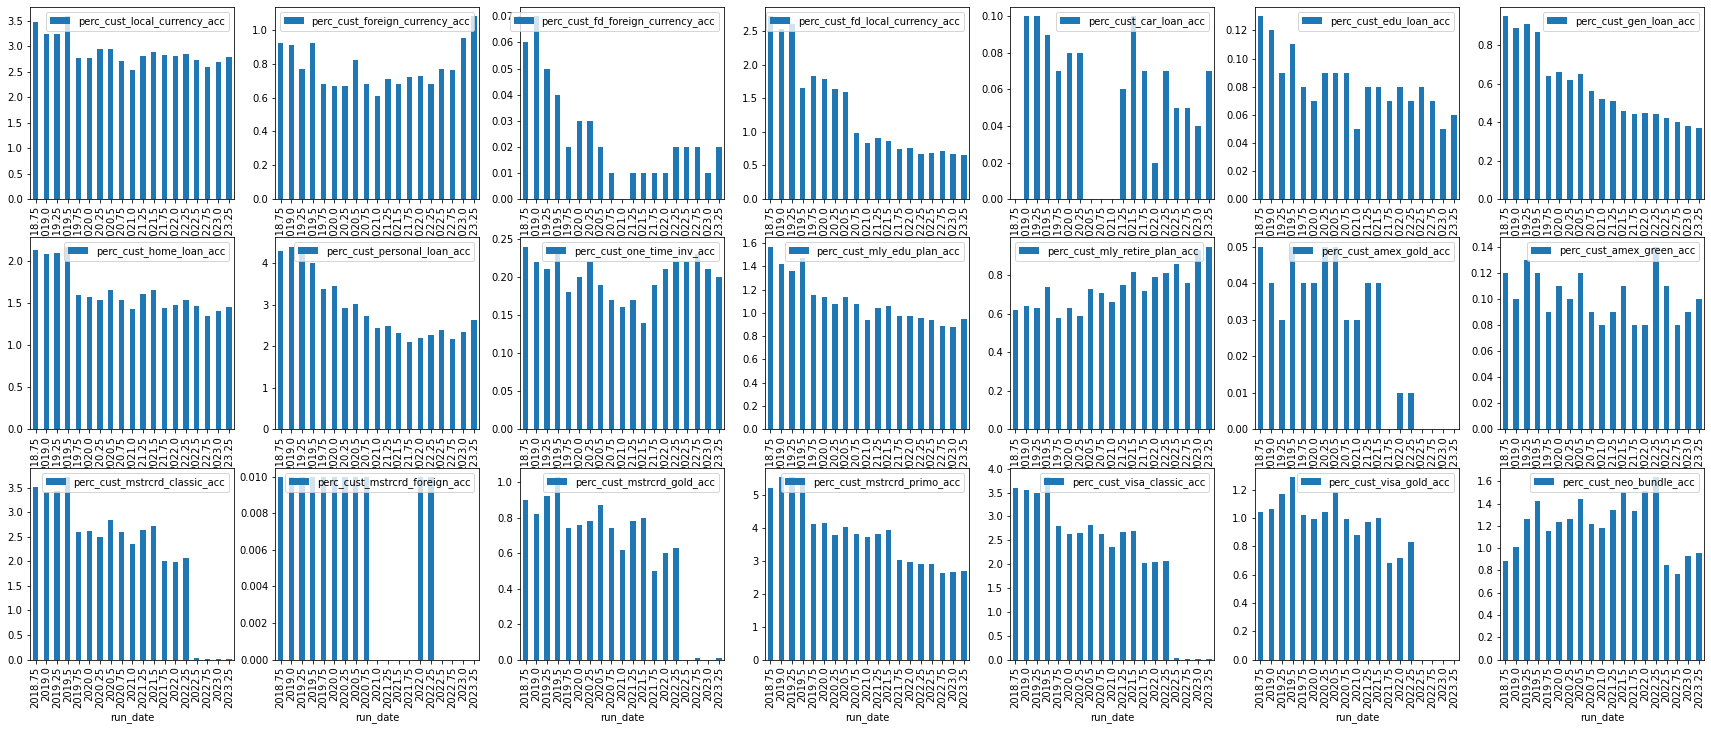

In [83]:
val = 'perc_cust'
df = data_eda_summary3_balseg2

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [84]:
data_eda_summary4_bs2 = data_eda_summary3_balseg2.iloc[:,:-1]
data_eda_summary5_bs2 = data_eda_summary4_bs2.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_bs2['dense_rank'] = (data_eda_summary5_bs2.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_bs2 = data_eda_summary5_bs2.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_bs2 = data_eda_summary6_bs2[data_eda_summary6_bs2.dense_rank<=3]
data_eda_summary6_bs2['products_revised'] = data_eda_summary6_bs2.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_bs2 = data_eda_summary6_bs2.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_bs2

,products_revised
run_date,
2018.75,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc
2019.00,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc
2019.25,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc
2019.50,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc
2019.75,mstrcrd_primo_acc ++ personal_loan_acc ++ visa_classic_acc
2020.00,mstrcrd_primo_acc ++ personal_loan_acc ++ local_currency_acc
2020.25,mstrcrd_primo_acc ++ local_currency_acc ++ personal_loan_acc
2020.50,mstrcrd_primo_acc ++ personal_loan_acc ++ local_currency_acc
2020.75,mstrcrd_primo_acc ++ personal_loan_acc ++ local_currency_acc


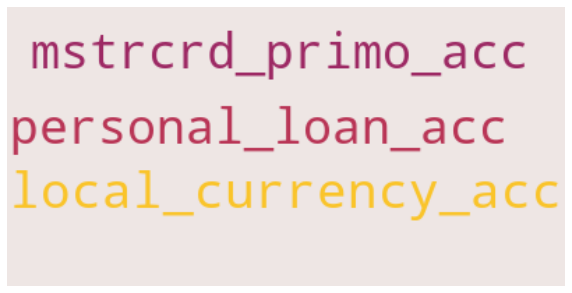

In [85]:
period=2023.25

# convert to dict
data_eda_summary6_bs2_overall = data_eda_summary6_bs2[data_eda_summary6_bs2.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs2_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs2_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs2_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

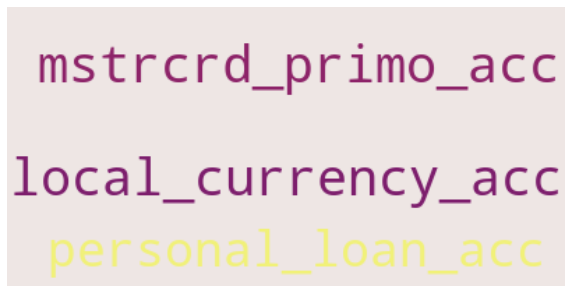

In [86]:
period=2023

# convert to dict
data_eda_summary6_bs2_overall = data_eda_summary6_bs2[data_eda_summary6_bs2.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs2_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs2_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs2_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

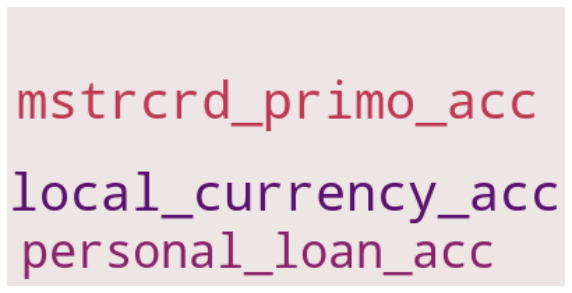

In [87]:
period=2022.75

# convert to dict
data_eda_summary6_bs2_overall = data_eda_summary6_bs2[data_eda_summary6_bs2.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs2_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs2_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs2_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion based on top 3 products based on percentage of customers who purchase those from the `savings balance segment of 2.5k to 50k`**

In recent years customers show a highlikelihood of purchase of products
like :- `local_currency_acc`,`mstrcrd_primo_acc` and `personal_loan_acc`

### Saving Balance : 50k+

In [88]:
data_eda_balseg3 = data_eda_balance[data_eda_balance.curr_sav_balance_band=='50k+'].groupby('run_date')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

data_eda_customers_balseg3 = data_eda_balance[data_eda_balance.curr_sav_balance_band=='50k+'].groupby('run_date')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_customers'})
data_eda_summary2_balseg3 = pd.merge(data_eda_balseg3,data_eda_customers_balseg3, how='inner', on='run_date').set_index('run_date')
data_eda_summary3_balseg3 = pd.DataFrame()

In [89]:
for col in data_eda_summary2_balseg3.columns:
    data_eda_summary3_balseg3['perc_cust_{}'.format(col[3:])] = round(100*(data_eda_summary2_balseg3[col]/data_eda_summary2_balseg3['num_customers']),2)
    
data_eda_summary3_balseg3 = data_eda_summary3_balseg3.reset_index()

<AxesSubplot:xlabel='run_date'>

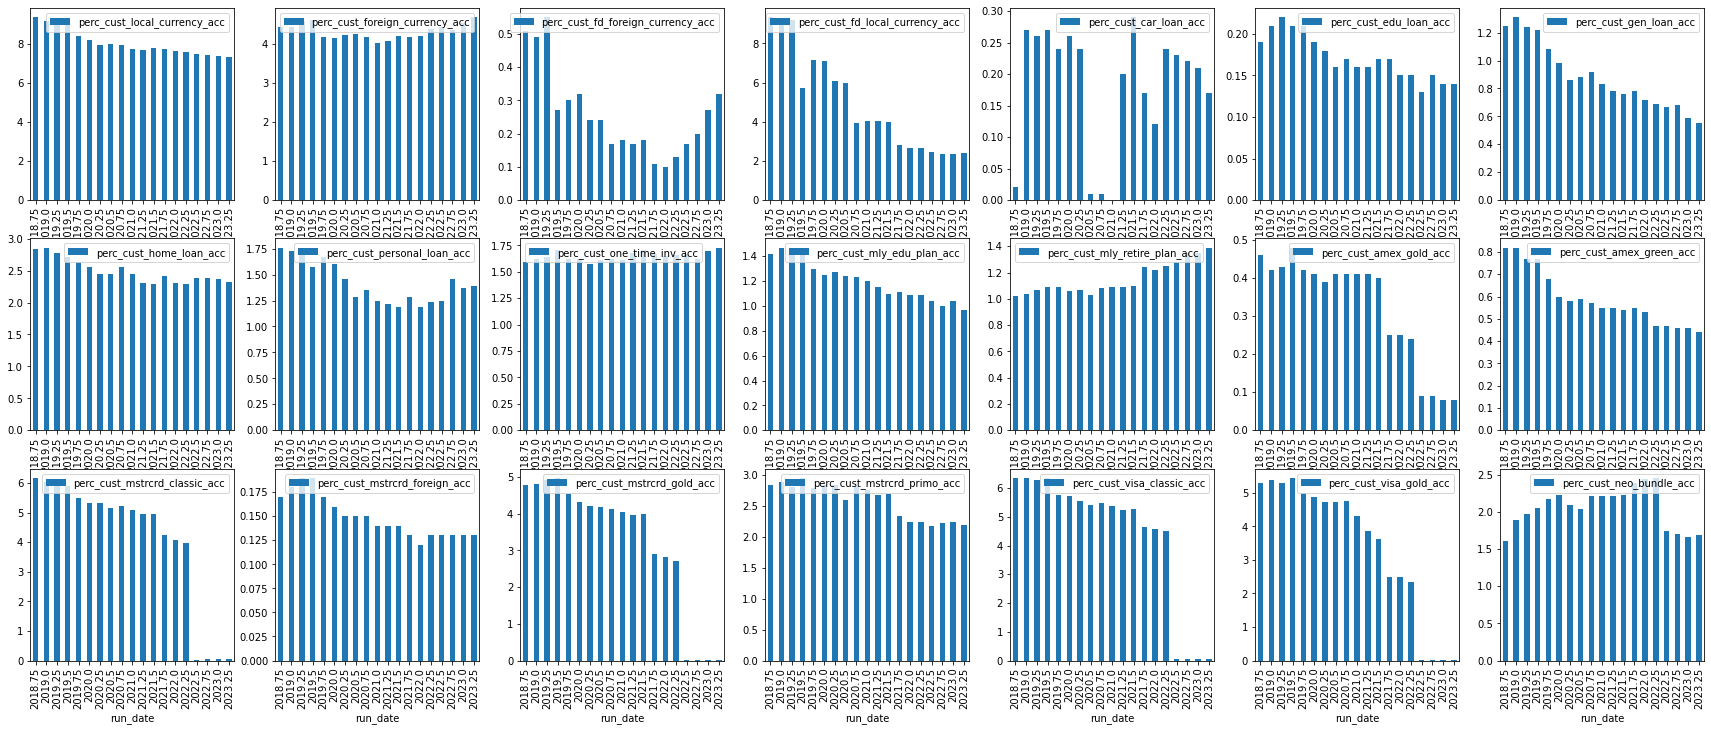

In [90]:
val = 'perc_cust'
df = data_eda_summary3_balseg3

fig, axes = plt.subplots(figsize=(30,12),nrows=3, ncols=7)

df.plot.bar(x='run_date', y='{}_local_currency_acc'.format(val), ax = axes[0,0])
df.plot.bar(x='run_date', y='{}_foreign_currency_acc'.format(val),ax = axes[0,1])
df.plot.bar(x='run_date', y='{}_fd_foreign_currency_acc'.format(val), ax = axes[0,2])
df.plot.bar(x='run_date', y='{}_fd_local_currency_acc'.format(val),ax = axes[0,3])
df.plot.bar(x='run_date', y='{}_car_loan_acc'.format(val), ax = axes[0,4])
df.plot.bar(x='run_date', y='{}_edu_loan_acc'.format(val),ax = axes[0,5])
df.plot.bar(x='run_date', y='{}_gen_loan_acc'.format(val), ax = axes[0,6])


df.plot.bar(x='run_date', y='{}_home_loan_acc'.format(val), ax = axes[1,0])
df.plot.bar(x='run_date', y='{}_personal_loan_acc'.format(val),ax = axes[1,1])
df.plot.bar(x='run_date', y='{}_one_time_inv_acc'.format(val), ax = axes[1,2])
df.plot.bar(x='run_date', y='{}_mly_edu_plan_acc'.format(val),ax = axes[1,3])
df.plot.bar(x='run_date', y='{}_mly_retire_plan_acc'.format(val),ax = axes[1,4])
df.plot.bar(x='run_date', y='{}_amex_gold_acc'.format(val), ax = axes[1,5])
df.plot.bar(x='run_date', y='{}_amex_green_acc'.format(val),ax = axes[1,6])

df.plot.bar(x='run_date', y='{}_mstrcrd_classic_acc'.format(val), ax = axes[2,0])
df.plot.bar(x='run_date', y='{}_mstrcrd_foreign_acc'.format(val), ax = axes[2,1])
df.plot.bar(x='run_date', y='{}_mstrcrd_gold_acc'.format(val),ax = axes[2,2])
df.plot.bar(x='run_date', y='{}_mstrcrd_primo_acc'.format(val), ax = axes[2,3])
df.plot.bar(x='run_date', y='{}_visa_classic_acc'.format(val),ax = axes[2,4])
df.plot.bar(x='run_date', y='{}_visa_gold_acc'.format(val), ax = axes[2,5])
df.plot.bar(x='run_date', y='{}_neo_bundle_acc'.format(val),ax = axes[2,6])

In [91]:
data_eda_summary4_bs3 = data_eda_summary3_balseg3.iloc[:,:-1]
data_eda_summary5_bs3 = data_eda_summary4_bs3.melt(id_vars=["run_date"], var_name="Products", value_name="Perc_cust")
data_eda_summary5_bs3['dense_rank'] = (data_eda_summary5_bs3.groupby(['run_date'])['Perc_cust'].rank(method='dense', ascending=False).astype(int))

data_eda_summary6_bs3 = data_eda_summary5_bs3.sort_values(by=['run_date','dense_rank'],ascending=[True,True])
data_eda_summary6_bs3 = data_eda_summary6_bs3[data_eda_summary6_bs3.dense_rank<=3]
data_eda_summary6_bs3['products_revised'] = data_eda_summary6_bs3.apply(lambda row : row['Products'][10:],axis=1)

data_eda_summary7_bs3 = data_eda_summary6_bs3.pivot_table(index="run_date", values=["products_revised"], aggfunc=lambda x: " ++ ".join(x))
data_eda_summary7_bs3

,products_revised
run_date,
2018.75,local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2019.00,fd_local_currency_acc ++ local_currency_acc ++ visa_classic_acc
2019.25,local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2019.50,local_currency_acc ++ visa_classic_acc ++ mstrcrd_classic_acc
2019.75,local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2020.00,local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2020.25,local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2020.50,local_currency_acc ++ fd_local_currency_acc ++ visa_classic_acc
2020.75,local_currency_acc ++ visa_classic_acc ++ mstrcrd_classic_acc


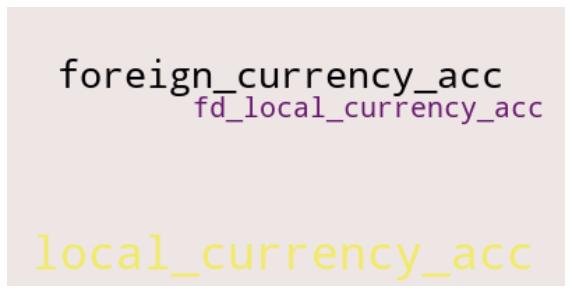

In [92]:
period=2023.25

# convert to dict
data_eda_summary6_bs3_overall = data_eda_summary6_bs3[data_eda_summary6_bs3.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs3_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs3_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs3_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

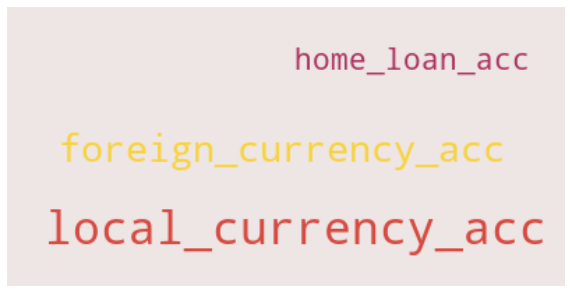

In [93]:
period=2023

# convert to dict
data_eda_summary6_bs3_overall = data_eda_summary6_bs3[data_eda_summary6_bs3.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs3_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs3_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs3_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

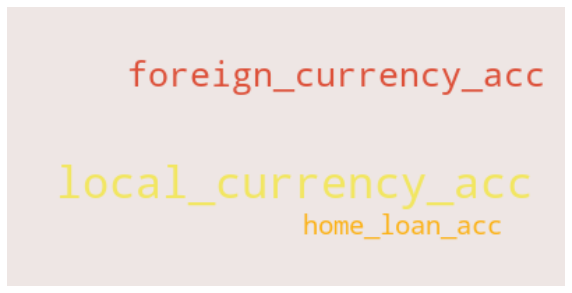

In [94]:
period=2022.75

# convert to dict
data_eda_summary6_bs3_overall = data_eda_summary6_bs3[data_eda_summary6_bs3.run_date==period][['products_revised','Perc_cust']].set_index('products_revised').to_dict()['Perc_cust']

from wordcloud import WordCloud
wc_bs3_overall = WordCloud(background_color='#EEE6E4', colormap='inferno', prefer_horizontal=1).generate_from_frequencies(data_eda_summary6_bs3_overall)

plt.figure(figsize=(10, 10))
plt.imshow(wc_bs3_overall, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion based on top 3 products based on percentage of customers who purchase those from the `savings balance segment of 50k+`**

In recent years customers show a highlikelihood of purchase of products
like :- `local_currency_acc`,`foreign_currency_acc` and `fd_local_currency_acc`

**Conclusion**

Over time in the last few quarters :-

***a.*** customers in savings balance tier of `2.5k to 50k` have relatively shift to purchasing `home-loans` which is not the case in higher savings balance tier (`50k+`)

***b.*** relatively more customers in savings balance tier of  `50k+` are opening `investment accounts` which is not the case in lower balance tiers

***c.*** relatively more customers in savings balance tier of  `2.5k to 50k` are purchasing `amex green accounts` which is not the case in higher savings balance tier (`50k+`)

# 5. Data Preparation for Modeling

### `Personalized Recommender System` Development for customers who purchase 3 or more unique products in the last 1.5 years since their last purchase quarter

### For `all customers` consider the `products purchased across time-points`

In [95]:
data_eda_2 = data_eda.copy()
data_eda_2['dense_rank'] = (data_eda_2.groupby('cust_number')['run_date'].rank(method='dense', ascending=False).astype(int))
data_eda_3 = data_eda_2[data_eda_2.dense_rank<=6]

In [96]:
data_a1 = data_eda_3[['run_date','cust_number','is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']]

In [97]:
data_a2 = data_eda_3.groupby('cust_number')[['is_local_currency_acc',\
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',\
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',\
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',\
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc',\
       'is_mly_retire_plan_acc', 'is_amex_gold_acc', 'is_amex_green_acc',\
       'is_mstrcrd_classic_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_gold_acc', 'is_mstrcrd_primo_acc', 'is_visa_classic_acc',\
       'is_visa_gold_acc', 'is_neo_bundle_acc']].sum().reset_index()

In [98]:
data_a2.shape, data_a2.cust_number.nunique()

((88355, 22), 88355)

In [99]:
for col in data_a2.columns[1:]:
    data_a2[col] = data_a2.apply(lambda row: 1 if row[col]>0 else 0, axis=1)

In [100]:
data_a2['tot_unique_prods_purchased'] = data_a2.apply(lambda row : row['is_local_currency_acc']+row['is_foreign_currency_acc']+row['is_fd_foreign_currency_acc']+row['is_fd_local_currency_acc']+row['is_car_loan_acc']+row['is_edu_loan_acc']+row['is_gen_loan_acc']+row['is_home_loan_acc']+row['is_personal_loan_acc']+row['is_one_time_inv_acc']+row['is_mly_edu_plan_acc']+row['is_mly_retire_plan_acc']+row['is_amex_gold_acc']+row['is_amex_green_acc']+row['is_mstrcrd_classic_acc']+row['is_mstrcrd_foreign_acc']+row['is_mstrcrd_gold_acc']+row['is_mstrcrd_primo_acc']+row['is_visa_classic_acc']+row['is_visa_gold_acc']+row['is_neo_bundle_acc'],axis=1)

In [101]:
data_a2.groupby('tot_unique_prods_purchased')['cust_number'].nunique().reset_index().rename(columns={'cust_number':'num_cust'})

,tot_unique_prods_purchased,num_cust
0,0,74695
1,1,8812
2,2,2722
3,3,1093
4,4,579
5,5,275
6,6,116
7,7,42
8,8,16
9,9,5


In [102]:
## considering users with 3 or more distinct product types purchased in the last 1.5 years

data_a3 = data_a2[data_a2.tot_unique_prods_purchased>=3]

In [103]:
data_a3.shape, data_a3.cust_number.nunique()

((2126, 23), 2126)

In [104]:
## data to be used for clustering (users who purchased less than 3 products in the last 1.5 years)

data_a4 = data_a2[data_a2.tot_unique_prods_purchased<3]

### For `all the above customers` demographic data consider `the latest information available`

In [105]:
data_b1 = data_eda_3[['run_date', 'cust_number','age', 'market_segment', 'salary', 'amt_incoming',\
       'amt_outcoming', 'curr_sav_balance']]

In [106]:
data_b1['dense_rank'] = (data_b1.groupby('cust_number')['run_date'].rank(method='dense', ascending=False).astype(int))

In [107]:
data_b2 = data_b1[data_b1.dense_rank==1]

In [108]:
data_b2[data_b2.salary>0].cust_number.nunique()/data_b2.cust_number.nunique()

0.18750495161564146

In [109]:
data_b2 = data_b2.drop(['dense_rank','run_date','salary'], axis=1) ## dropping salary column as only 19% of the customers have salary record present

In [110]:
data_b2.shape, data_b2.cust_number.nunique()

((88355, 6), 88355)

#### Use this data for clustering to recommend items for users having distinct products purchased as less than 3

In [111]:
data_for_clustering = pd.merge(data_a2, data_b2, how='inner',on='cust_number')

In [112]:
data_for_clustering2 = data_for_clustering[['cust_number', 'is_local_currency_acc', 'is_foreign_currency_acc',\
       'is_fd_foreign_currency_acc', 'is_fd_local_currency_acc',\
       'is_car_loan_acc', 'is_edu_loan_acc', 'is_gen_loan_acc',\
       'is_home_loan_acc', 'is_personal_loan_acc', 'is_one_time_inv_acc',\
       'is_mly_edu_plan_acc', 'is_mly_retire_plan_acc', 'is_amex_gold_acc',\
       'is_amex_green_acc', 'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_primo_acc', \
       'is_neo_bundle_acc','tot_unique_prods_purchased', \
       'age', 'market_segment', 'amt_incoming', 'amt_outcoming',\
       'curr_sav_balance']]

In [113]:
data_for_clustering3 = data_for_clustering2.copy()
data_for_clustering3['cust_who_need_reco'] = data_for_clustering3.apply(lambda row:1 if row['tot_unique_prods_purchased']<3 else 0,axis=1)

In [114]:
data_for_clustering3.shape,data_for_clustering3.cust_number.nunique()
## age, curr_sav_amt, incoming_amt, outgoing_amt

((88355, 25), 88355)

In [115]:
data_for_clustering3.groupby('cust_who_need_reco')['cust_number'].nunique()

cust_who_need_reco
0     2126
1    86229
Name: cust_number, dtype: int64

### Data to be used for building Recommendation Engine for users `having distinct item purchase range of 3 or more`

In [116]:
data_revised = pd.merge(data_a3, data_b2, how='inner',on='cust_number')

In [117]:
data_revised.shape

(2126, 28)

In [118]:
data_revised = data_revised.drop(['is_mstrcrd_classic_acc','is_mstrcrd_gold_acc', 'is_visa_classic_acc', 'is_visa_gold_acc'], axis=1)

**'is_mstrcrd_classic_acc','is_mstrcrd_gold_acc', 'is_visa_classic_acc', 'is_visa_gold_acc' --> **

`not considered for analysis because of no or significantly smaller number of people purchasing the same in the last few quarters`

In [119]:
cols = ['is_local_currency_acc', 'is_foreign_currency_acc',\
       'is_fd_foreign_currency_acc', 'is_fd_local_currency_acc',\
       'is_car_loan_acc', 'is_edu_loan_acc', 'is_gen_loan_acc',\
       'is_home_loan_acc', 'is_personal_loan_acc', 'is_one_time_inv_acc',\
       'is_mly_edu_plan_acc', 'is_mly_retire_plan_acc', 'is_amex_gold_acc',\
       'is_amex_green_acc',  'is_mstrcrd_foreign_acc',\
       'is_mstrcrd_primo_acc',\
       'is_neo_bundle_acc']
for col in cols:
    data_revised[col] = data_revised[col].apply(lambda row: 1 if row>=1 else 0)

# 6. Create three recommender models :

**a.** Popularity based Model

**b.** User-Item based Model

**c.** Machine Learning Model based on Decision Tree

#### Data Cleaning before creating Recommender system

In [120]:
data_revised[data_revised.age>=0].cust_number.nunique()/data_revised.cust_number.nunique()

1.0

In [121]:
data_revised.loc[data_revised.amt_incoming<0,'amt_incoming'].shape[0]

1

In [122]:
data_revised.loc[data_revised.amt_outcoming<0,'amt_outcoming'].shape[0]

0

#### Replacing negative values by Median of the columns : `amt_trax_incoming` and `amt_trax_outcoming`

In [123]:
data_revised.loc[data_revised.amt_incoming<0,'amt_incoming'] = data_revised[data_revised.amt_incoming>=0]['amt_incoming'].median()

In [124]:
data_revised.loc[data_revised.amt_outcoming<0,'amt_outcoming'] = data_revised[data_revised.amt_outcoming>=0]['amt_outcoming'].median()

In [125]:
pd.qcut(data_revised.amt_incoming,3)[:1]

0    (-0.001, 36561.688]
Name: amt_incoming, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 36561.688] < (36561.688, 80567.079] < (80567.079, 14698928.101]]

In [126]:
pd.qcut(data_revised.amt_outcoming,3)[:1]

0    (-0.001, 35551.578]
Name: amt_outcoming, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 35551.578] < (35551.578, 79344.589] < (79344.589, 14296429.748]]

In [127]:
pd.qcut(data_revised.curr_sav_balance,3)[:1]

0    (0.169, 47836.154]
Name: curr_sav_balance, dtype: category
Categories (3, interval[float64, right]): [(0.169, 47836.154] < (47836.154, 569052.118] < (569052.118, 368590984.62]]

In [128]:
pd.qcut(data_revised.age,3)[:1]

0    (40.0, 53.0]
Name: age, dtype: category
Categories (3, interval[float64, right]): [(21.999, 40.0] < (40.0, 53.0] < (53.0, 99.0]]

### Creating `categorical groupings` for `age, amt_incoming, amt_outgoing, curr_saving_balance`

In [129]:
data_revised['age_band'] = data_revised.apply(lambda row:'below_{}'.format(data_revised.age.quantile(0.333)) if row['age']<data_revised.age.quantile(0.333) else '{}'.format(data_revised.age.quantile(0.333))+'_'+'{}'.format(data_revised.age.quantile(0.667)) if ((row['age']>=data_revised.age.quantile(0.333)) & (row['age']<data_revised.age.quantile(0.667))) else '{}'.format(data_revised.age.quantile(0.667))+'+',axis=1)

In [130]:
data_revised['amt_incoming_band'] = data_revised.apply(lambda row:'below_{}'.format(data_revised.amt_incoming.quantile(0.333)) if row['amt_incoming']<data_revised.amt_incoming.quantile(0.333) else '{}'.format(data_revised.amt_incoming.quantile(0.333))+'_'+'{}'.format(data_revised.amt_incoming.quantile(0.667)) if ((row['amt_incoming']>=data_revised.amt_incoming.quantile(0.333)) & (row['amt_incoming']<data_revised.amt_incoming.quantile(0.667))) else '{}'.format(data_revised.amt_incoming.quantile(0.667))+'+',axis=1)

In [131]:
data_revised['amt_outcoming_band'] = data_revised.apply(lambda row:'below_{}'.format(data_revised.amt_outcoming.quantile(0.333)) if row['amt_outcoming']<data_revised.amt_outcoming.quantile(0.333) else '{}'.format(data_revised.amt_outcoming.quantile(0.333))+'_'+'{}'.format(data_revised.amt_outcoming.quantile(0.667)) if ((row['amt_outcoming']>=data_revised.amt_outcoming.quantile(0.333)) & (row['amt_outcoming']<data_revised.amt_outcoming.quantile(0.667))) else '{}'.format(data_revised.amt_outcoming.quantile(0.667))+'+',axis=1)

In [132]:
data_revised['balance_band'] = data_revised.apply(lambda row:'below_{}'.format(data_revised.curr_sav_balance.quantile(0.333)) if row['curr_sav_balance']<data_revised.curr_sav_balance.quantile(0.333) else '{}'.format(data_revised.curr_sav_balance.quantile(0.333))+'_'+'{}'.format(data_revised.curr_sav_balance.quantile(0.667)) if ((row['curr_sav_balance']>=data_revised.curr_sav_balance.quantile(0.333)) & (row['curr_sav_balance']<data_revised.curr_sav_balance.quantile(0.667))) else '{}'.format(data_revised.curr_sav_balance.quantile(0.667))+'+',axis=1)

In [133]:
cat_columns = ['market_segment','age_band','amt_incoming_band','amt_outcoming_band','balance_band']

In [134]:
one_hot_encoded = pd.get_dummies(data_revised[cat_columns],columns=cat_columns ,drop_first=False)
data_revised = pd.concat([data_revised, one_hot_encoded], axis=1)

In [135]:
data_revised.head(2)

,cust_number,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc,tot_unique_prods_purchased,age,market_segment,amt_incoming,amt_outcoming,curr_sav_balance,age_band,amt_incoming_band,amt_outcoming_band,balance_band,market_segment_MASS,market_segment_MASS AFFLUENT,market_segment_MCB INTERNATIONAL,market_segment_MCB SELECT,market_segment_MCB SELECT INTERNATIONAL,market_segment_PRIVATE BANKING,market_segment_PRIVATE BANKING INTERNATIONAL,market_segment_PRIVATE BANKING LOCAL,market_segment_SEGMENT 18-25,age_band_40.0_53.0,age_band_53.0+,age_band_below_40.0,amt_incoming_band_36555.44710227274_80587.50141666668,amt_incoming_band_80587.50141666668+,amt_incoming_band_below_36555.44710227274,amt_outcoming_band_35530.089374999996_79435.69191964286,amt_outcoming_band_79435.69191964286+,amt_outcoming_band_below_35530.089374999996,balance_band_47799.306498750004_569339.8038850001,balance_band_569339.8038850001+,balance_band_below_47799.306498750004
0,00169ed9def5f8765a9a7c829dc4955a,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,46,MASS AFFLUENT,34368.551667,33153.330000,13599.38,40.0_53.0,below_36555.44710227274,below_35530.089374999996,below_47799.306498750004,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1,00255535f431b4967724041e046f0f61,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,4,41,MASS,7033.333333,31940.583333,109.81,40.0_53.0,below_36555.44710227274,below_35530.089374999996,below_47799.306498750004,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [136]:
data_revised.drop(cat_columns,axis=1,inplace=True)

In [137]:
data_revised.drop(['age','amt_incoming','amt_outcoming','curr_sav_balance','tot_unique_prods_purchased'],axis=1,inplace=True)

In [138]:
data_revised.head(2)

,cust_number,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc,market_segment_MASS,market_segment_MASS AFFLUENT,market_segment_MCB INTERNATIONAL,market_segment_MCB SELECT,market_segment_MCB SELECT INTERNATIONAL,market_segment_PRIVATE BANKING,market_segment_PRIVATE BANKING INTERNATIONAL,market_segment_PRIVATE BANKING LOCAL,market_segment_SEGMENT 18-25,age_band_40.0_53.0,age_band_53.0+,age_band_below_40.0,amt_incoming_band_36555.44710227274_80587.50141666668,amt_incoming_band_80587.50141666668+,amt_incoming_band_below_36555.44710227274,amt_outcoming_band_35530.089374999996_79435.69191964286,amt_outcoming_band_79435.69191964286+,amt_outcoming_band_below_35530.089374999996,balance_band_47799.306498750004_569339.8038850001,balance_band_569339.8038850001+,balance_band_below_47799.306498750004
0,00169ed9def5f8765a9a7c829dc4955a,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1,00255535f431b4967724041e046f0f61,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


## 6 a. Popularity Based Recommender Model

In [139]:
data_pop = data_revised.copy()

In [140]:
def popularity_based(df):
    """
    Function that calculates the probability of a product occurring. 
    Probability range is <0, 1>.
    """
    top_prod = {}
    for col in df.columns[1:18]:
        top_prod[col] = df[col].value_counts()[1]
    
    for k, v in top_prod.items():
        top_prod[k] = np.around(v / df.shape[0], decimals=4)
        
#     top_col2 = pd.DataFrame(top_prod,index=[0]).T.reset_index().rename(columns={0:'relative frequency'})
#     top_col2 = top_col2.sort_values(by='relative frequency',ascending=False)
    
        
        
    return top_prod

In [141]:
popularity_based(data_pop)

{'is_local_currency_acc': 0.5085,
 'is_foreign_currency_acc': 0.2479,
 'is_fd_foreign_currency_acc': 0.0372,
 'is_fd_local_currency_acc': 0.1195,
 'is_car_loan_acc': 0.0306,
 'is_edu_loan_acc': 0.0188,
 'is_gen_loan_acc': 0.095,
 'is_home_loan_acc': 0.293,
 'is_personal_loan_acc': 0.2418,
 'is_one_time_inv_acc': 0.0983,
 'is_mly_edu_plan_acc': 0.0894,
 'is_mly_retire_plan_acc': 0.1261,
 'is_amex_gold_acc': 0.0348,
 'is_amex_green_acc': 0.0696,
 'is_mstrcrd_foreign_acc': 0.0141,
 'is_mstrcrd_primo_acc': 0.0955,
 'is_neo_bundle_acc': 0.3833}

Text(0.5, 1.0, 'Popular Products purchased by users across time')

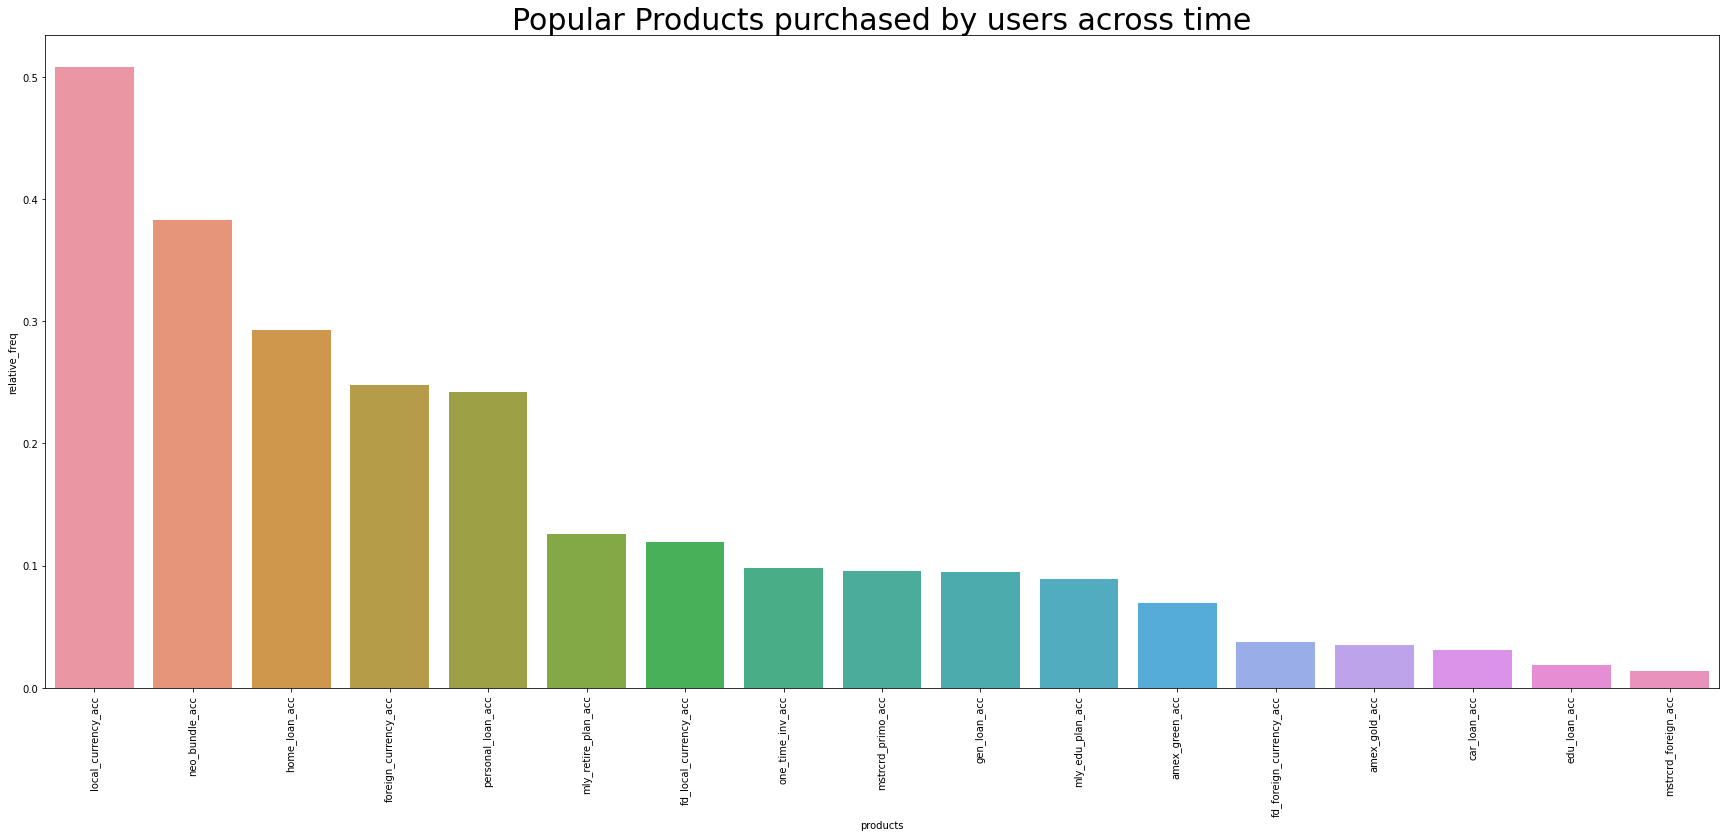

In [142]:
df_pop_0 = pd.DataFrame(popularity_based(data_pop),index=[0]).T.reset_index().rename(columns={0:'relative_frequency'})
df_pop = df_pop_0.sort_values(by='relative_frequency',ascending=False)
df_pop.columns = ['products','relative_freq']

df_pop['products'] = df_pop.apply(lambda row: row['products'][3:],axis=1)

plt.subplots(figsize=(30,12))
ax=sns.barplot( x= df_pop['products'],y= df_pop['relative_freq'])
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set_title("Popular Products purchased by users across time",fontsize=30)

## 6 b. `User-Item based` Recommender system

In [143]:
data_ui = data_revised.copy()
data_ui = data_ui.set_index('cust_number')
data_ui = data_ui[cols]

In [144]:
data_ui.head(2)

,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc
cust_number,,,,,,,,,,,,,,,,,
00169ed9def5f8765a9a7c829dc4955a,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
00255535f431b4967724041e046f0f61,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [145]:
from sklearn.metrics.pairwise import pairwise_distances 

# create the user-item similarity matrix
# removes index names
cosine_sim = 1 - pairwise_distances(data_ui, metric="cosine")

In [146]:
def useritem(user_id, df, sim_matrix = cosine_sim):
    """
    Function that calculates recommendations for a given user.
    It uses cosine similarity to calculate the most similar users.
    Returns the probability of products for a given user based on similar users.
    Probability range is <0, 1>.
    """
    # computes the index in the user-item similarity matrix for a given user_id
    cos_id = list(df.index).index(user_id) 
    
    # number of similar users
    k = 0
    sim_min = 0.75
    user_sim_k = {}
    
    while k < 20:
        # creates the dictionary {'similar user':'similarity'}
        for user in range(len(df)):
            
            # 0.99 because I don`t want the same user as user_id
            if sim_min < sim_matrix[cos_id, user] < 0.99:
                user_sim_k[user] = sim_matrix[cos_id, user]
                k+=1
                
        sim_min -= 0.025
        
        # if there are no users with similarity at least 0.5, the recommendation probability will be set to 0 
        if sim_min < 0.65:
            break
            
    # sorted k most similar users
    user_sim_k = dict(sorted(user_sim_k.items(), key=lambda item: item[1], reverse=True))
    user_id_k = list(user_sim_k.keys()) 
    
    # dataframe with k most similar users
    df_user_k = df.iloc[user_id_k]
    df_user_k_T = df_user_k.T
    
    # change the user index to the cosine index
    df_user_k_T.columns = user_id_k
    
    # mean of ownership by k similar users
    ownership = []
    usit = {}
    
    for row_name, row in df_user_k_T.iterrows():
        
        for indx, own in row.items():
            
            ownership.append(own) 
        
        usit[row_name] = np.mean(ownership)
        ownership = []
        
    # if there are no users with similarity at least 0.5, the recommendation probability is 0 
    if pd.isna(list(usit.values())[0]) == True:
        
        usit = {key : 0 for (key, value) in usit.items()}
        usit = pd.DataFrame(usit,index=[0])
        
            
    return usit


In [147]:
#list(pd.DataFrame(useritem('0041e77e43b24d486f56e43c66cc9df9', data_ui),index=[0]).T.reset_index().rename(columns={'index':'top_three_products_recommended',0:'likelihood_of_purchase'}).sort_values(by='likelihood_of_purchase',ascending=False).iloc[:3,0])

In [148]:
useritem('0041e77e43b24d486f56e43c66cc9df9', data_ui)

{'is_local_currency_acc': 1.0,
 'is_foreign_currency_acc': 0.22900763358778625,
 'is_fd_foreign_currency_acc': 0.007633587786259542,
 'is_fd_local_currency_acc': 0.06870229007633588,
 'is_car_loan_acc': 0.03816793893129771,
 'is_edu_loan_acc': 0.022900763358778626,
 'is_gen_loan_acc': 0.09923664122137404,
 'is_home_loan_acc': 1.0,
 'is_personal_loan_acc': 0.12213740458015267,
 'is_one_time_inv_acc': 0.030534351145038167,
 'is_mly_edu_plan_acc': 0.030534351145038167,
 'is_mly_retire_plan_acc': 0.07633587786259542,
 'is_amex_gold_acc': 0.007633587786259542,
 'is_amex_green_acc': 0.022900763358778626,
 'is_mstrcrd_foreign_acc': 0.0,
 'is_mstrcrd_primo_acc': 0.07633587786259542,
 'is_neo_bundle_acc': 0.16793893129770993}

## 6 c. Machine Learning Model using `Random Forest` algorithm to predict the likelihood of purchase of each of the products by a customer

In [149]:
data_dt = data_revised.copy()
data_dt = data_dt.set_index('cust_number')

In [150]:
data_dt.columns

Index(['is_local_currency_acc', 'is_foreign_currency_acc',
       'is_fd_foreign_currency_acc', 'is_fd_local_currency_acc',
       'is_car_loan_acc', 'is_edu_loan_acc', 'is_gen_loan_acc',
       'is_home_loan_acc', 'is_personal_loan_acc', 'is_one_time_inv_acc',
       'is_mly_edu_plan_acc', 'is_mly_retire_plan_acc', 'is_amex_gold_acc',
       'is_amex_green_acc', 'is_mstrcrd_foreign_acc', 'is_mstrcrd_primo_acc',
       'is_neo_bundle_acc', 'market_segment_MASS',
       'market_segment_MASS AFFLUENT', 'market_segment_MCB INTERNATIONAL',
       'market_segment_MCB SELECT', 'market_segment_MCB SELECT INTERNATIONAL',
       'market_segment_PRIVATE BANKING',
       'market_segment_PRIVATE BANKING INTERNATIONAL',
       'market_segment_PRIVATE BANKING LOCAL', 'market_segment_SEGMENT 18-25',
       'age_band_40.0_53.0', 'age_band_53.0+', 'age_band_below_40.0',
       'amt_incoming_band_36555.44710227274_80587.50141666668',
       'amt_incoming_band_80587.50141666668+',
       'amt_incoming_ba

### Model Hyper Parameter Tuning 

In [151]:
## Tuning hyper parameters
# param_grid_tree = {
#      'max_features' : ['log2','sqrt'],\
#      'n_estimators' : [200,300,500],\
#      'max_depth' : [5,6,8],\
#      'criterion' : ['gini']}



# grid_tree = GridSearchCV(RandomForestClassifier(), param_grid_tree, cv=4, scoring='average_precision')

# for c in data_dt.columns:
#     y_train = data_dt[c].astype('int') 
#     x_train = data_dt.drop([c], axis = 1)
#     grid_tree.fit(x_train, y_train)
        
# tree_clf_new = grid_tree.best_estimator_
# grid_tree.cv_results_
# tree_clf_new

##RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=300)

In [152]:
#grid_tree.cv_results_

In [153]:
# # Tuning hyper parameters
# param_grid_tree = {
#      'max_depth' : [4,5,6,8]}



# grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=4, scoring='average_precision')

# for c in data_dt.columns:
#     y_train = data_dt[c].astype('int') 
#     x_train = data_dt.drop([c], axis = 1)
#     grid_tree.fit(x_train, y_train)
        
# tree_clf_new = grid_tree.best_estimator_
# #grid_tree.cv_results_
# tree_clf_new

# #DecisionTreeClassifier(max_depth=4)

In [154]:
#grid_tree.cv_results_

In [155]:
def modelbased(user_id, df, model=DecisionTreeClassifier(max_depth=4)):
    """
    Function that calculates recommendations for a given user.
    It uses machine learning model to calculate the probability of products.
    Probability range is <0, 1>.   
    """
    
    mdbs = {}
    
    for c in df[cols].columns:
        y_train = df[c].astype('int')
        x_train = df.drop([c], axis = 1)
        model.fit(x_train, y_train)
        p_train = model.predict_proba(x_train[x_train.index == user_id])[:,1]
        
        mdbs[c] = p_train[0]
        
    return mdbs

In [156]:
modelbased('0041e77e43b24d486f56e43c66cc9df9', data_dt, model=DecisionTreeClassifier(max_depth=4))

{'is_local_currency_acc': 0.9007352941176471,
 'is_foreign_currency_acc': 0.5945945945945946,
 'is_fd_foreign_currency_acc': 0.006507592190889371,
 'is_fd_local_currency_acc': 0.147,
 'is_car_loan_acc': 0.0718562874251497,
 'is_edu_loan_acc': 0.007194244604316547,
 'is_gen_loan_acc': 0.06,
 'is_home_loan_acc': 0.6446280991735537,
 'is_personal_loan_acc': 0.13414634146341464,
 'is_one_time_inv_acc': 0.06923076923076923,
 'is_mly_edu_plan_acc': 0.06896551724137931,
 'is_mly_retire_plan_acc': 0.13559322033898305,
 'is_amex_gold_acc': 0.01606425702811245,
 'is_amex_green_acc': 0.006472491909385114,
 'is_mstrcrd_foreign_acc': 0.002056555269922879,
 'is_mstrcrd_primo_acc': 0.017543859649122806,
 'is_neo_bundle_acc': 0.0}

## 6 d. Weighted Recommender Model combining `Popularity Based Model`, `Rule Based Model` and `Machine Learning Model`

In [157]:
def hybrid(user_id, df_p, df_u, df_m, f1, f2, f3):
    """
    Function that calculates weighted hybrid recommendations for a given user.
    It uses weights to calculate the probability of products. 
    """
    pb_h = popularity_based(df_p)
    ui_h = useritem(user_id, df_u)
    mb_h =  modelbased(user_id, df_m)

    hybrid = {}
    for k, v in pb_h.items():
        hybrid[k] = (v * f1) + (ui_h[k] * f2) + (mb_h[k] * f3)
    
    return hybrid

In [158]:
hybrid_rec_00255535f431b4967724041e046f0f61 = hybrid('00255535f431b4967724041e046f0f61', df_p = data_pop, df_u = data_ui, df_m = data_dt, f1 = 0.25, f2 = 0.25, f3 = 0.5)
hybrid_rec_00255535f431b4967724041e046f0f61

{'is_local_currency_acc': 0.7284931592039801,
 'is_foreign_currency_acc': 0.13340357142857143,
 'is_fd_foreign_currency_acc': 0.009740917107583773,
 'is_fd_local_currency_acc': 0.103375,
 'is_car_loan_acc': 0.04618155339805825,
 'is_edu_loan_acc': 0.0054645259938837926,
 'is_gen_loan_acc': 0.09061626746506987,
 'is_home_loan_acc': 0.16925,
 'is_personal_loan_acc': 0.15890559845559846,
 'is_one_time_inv_acc': 0.21050975395430582,
 'is_mly_edu_plan_acc': 0.14294294871794871,
 'is_mly_retire_plan_acc': 0.11602755102040815,
 'is_amex_gold_acc': 0.016732128514056224,
 'is_amex_green_acc': 0.05032181069958848,
 'is_mstrcrd_foreign_acc': 0.004553277634961439,
 'is_mstrcrd_primo_acc': 0.10079807692307693,
 'is_neo_bundle_acc': 0.10161650579150579}

In [159]:
def reco_user_top3(user_id):
    
    """
    Funcion that returns the top 12 recommendations for each userid
    """
    
    h = pd.DataFrame(hybrid(user_id, df_p = data_pop, df_u = data_ui, df_m = data_dt, f1 = 0.25, f2 = 0.25, f3 = 0.5),index=[0]).T.reset_index()
    h['index'] = h.apply(lambda row:row['index'][3:] , axis=1)
    #k = frozenset(h.sort_values(by=0,ascending=False)[:10]['index'][:10])
    k = tuple(h.sort_values(by=0,ascending=False)[:12]['index'][:12])
    return k

In [160]:
reco_user_top3('0041e77e43b24d486f56e43c66cc9df9')

('local_currency_acc',
 'home_loan_acc',
 'foreign_currency_acc',
 'personal_loan_acc',
 'neo_bundle_acc',
 'fd_local_currency_acc',
 'mly_retire_plan_acc',
 'gen_loan_acc',
 'one_time_inv_acc',
 'mly_edu_plan_acc',
 'car_loan_acc',
 'mstrcrd_primo_acc')

###  `Recommender dataframe that provides the top 10 recommended items for each user`

In [161]:
recommender_df = data_dt.copy()
recommender_df = recommender_df.reset_index()
recommender_df['recommended_products']=None
for i in range(0,recommender_df.shape[0]):
    recommender_df['recommended_products'][i] = reco_user_top3(recommender_df.loc[i,'cust_number'])
    recommender_df

In [162]:
recommender_df.shape[0]

2126

In [163]:
recommender_df[~recommender_df.recommended_products.isna()].shape

(2126, 40)

In [165]:
#recommender_df.columns

In [166]:
## To keep the order of any set intact in it's original order (Ordered Set functionality)

import collections.abc

class OrderedSet(collections.abc.Set):
    def __init__(self, iterable=()):
        self.d = collections.OrderedDict.fromkeys(iterable)

    def __len__(self):
        return len(self.d)

    def __contains__(self, element):
        return element in self.d

    def __iter__(self):
        return iter(self.d)

## 6 e. Get the Recommendation for the above 2126 customers by re-considering the recommendations after removing the already purchased products

In [167]:
recommender_df_revised = recommender_df[['cust_number', 'is_local_currency_acc', 'is_foreign_currency_acc',\
       'is_fd_foreign_currency_acc', 'is_fd_local_currency_acc',\
       'is_car_loan_acc', 'is_edu_loan_acc', 'is_gen_loan_acc',\
       'is_home_loan_acc', 'is_personal_loan_acc', 'is_one_time_inv_acc',\
       'is_mly_edu_plan_acc', 'is_mly_retire_plan_acc', 'is_amex_gold_acc',\
       'is_amex_green_acc', 'is_mstrcrd_foreign_acc', 'is_mstrcrd_primo_acc',\
       'is_neo_bundle_acc','recommended_products']].copy()

recommender_df_revised.loc[-1] = [recommender_df_revised.columns[0],recommender_df_revised.columns[1],recommender_df_revised.columns[2],\
                                  recommender_df_revised.columns[3],recommender_df_revised.columns[4],recommender_df_revised.columns[5],\
                                  recommender_df_revised.columns[6],recommender_df_revised.columns[7],recommender_df_revised.columns[8],\
                                  recommender_df_revised.columns[9],recommender_df_revised.columns[10],recommender_df_revised.columns[11],\
                                  recommender_df_revised.columns[12],recommender_df_revised.columns[13],recommender_df_revised.columns[14],\
                                  recommender_df_revised.columns[15],recommender_df_revised.columns[16],recommender_df_revised.columns[17],\
                                  recommender_df_revised.columns[18]]# adding a row

recommender_df_revised.index = recommender_df_revised.index + 1  # shifting index
    
recommender_df_revised = recommender_df_revised.sort_index()  # sorting by index

In [168]:
for i in recommender_df_revised.columns:
    recommender_df_revised.at[0,i] = recommender_df_revised.at[0,i][3:]

In [169]:
for i in range(0,recommender_df_revised.shape[0]):
    for j in recommender_df_revised.columns[1:recommender_df_revised.shape[1]-1]:
        if recommender_df_revised.at[i,j]==0:
            recommender_df_revised.at[i,j] = 0
        else:
            recommender_df_revised.at[i,j] = recommender_df_revised.at[0,j]

In [170]:
recommender_df_revised.set_index(['cust_number','recommended_products'],inplace=True)

In [171]:
recommender_df_revised['purchased_products'] = recommender_df_revised.apply(tuple,1)

In [172]:
recommender_df_revised =recommender_df_revised.reset_index()
#recommender_df_revised.head(2)

In [173]:
recommender_df_revised['final_recommended_products'] = recommender_df_revised.apply(lambda row: list(OrderedSet(row['recommended_products']) - OrderedSet(row['purchased_products'])),axis=1)

In [174]:
## The final dataframe will have two columns 'cust_number','final_recommendation'
recommender_df_revised[recommender_df_revised.cust_number=='00255535f431b4967724041e046f0f61'][['cust_number','recommended_products','purchased_products','final_recommended_products']]

,cust_number,recommended_products,purchased_products,final_recommended_products
2,00255535f431b4967724041e046f0f61,"(local_currency_acc, one_time_inv_acc, home_loan_acc, personal_loan_acc, mly_edu_plan_acc, foreign_currency_acc, mly_retire_plan_acc, fd_local_currency_acc, neo_bundle_acc, mstrcrd_primo_acc, gen_loan_acc, amex_green_acc)","(local_currency_acc, 0, 0, 0, car_loan_acc, 0, 0, 0, 0, one_time_inv_acc, 0, mly_retire_plan_acc, 0, 0, 0, 0, 0)","[home_loan_acc, personal_loan_acc, mly_edu_plan_acc, foreign_currency_acc, fd_local_currency_acc, neo_bundle_acc, mstrcrd_primo_acc, gen_loan_acc, amex_green_acc]"


In [175]:
recommender_df_revised['final_recommendation'] = recommender_df_revised.apply(lambda row: row['final_recommended_products'][:3],axis=1)

In [176]:
## The final dataframe will have two columns 'cust_number','final_recommendation'
recommender_df_revised[recommender_df_revised.cust_number=='00255535f431b4967724041e046f0f61'][['cust_number','recommended_products','purchased_products','final_recommended_products','final_recommendation']]

,cust_number,recommended_products,purchased_products,final_recommended_products,final_recommendation
2,00255535f431b4967724041e046f0f61,"(local_currency_acc, one_time_inv_acc, home_loan_acc, personal_loan_acc, mly_edu_plan_acc, foreign_currency_acc, mly_retire_plan_acc, fd_local_currency_acc, neo_bundle_acc, mstrcrd_primo_acc, gen_loan_acc, amex_green_acc)","(local_currency_acc, 0, 0, 0, car_loan_acc, 0, 0, 0, 0, one_time_inv_acc, 0, mly_retire_plan_acc, 0, 0, 0, 0, 0)","[home_loan_acc, personal_loan_acc, mly_edu_plan_acc, foreign_currency_acc, fd_local_currency_acc, neo_bundle_acc, mstrcrd_primo_acc, gen_loan_acc, amex_green_acc]","[home_loan_acc, personal_loan_acc, mly_edu_plan_acc]"


In [177]:
recommender_df_revised[recommender_df_revised.cust_number=='00255535f431b4967724041e046f0f61'][['cust_number','final_recommendation']]

,cust_number,final_recommendation
2,00255535f431b4967724041e046f0f61,"[home_loan_acc, personal_loan_acc, mly_edu_plan_acc]"


## 6 f. Evaluation based on Precision at k measure - Back Testing

In [180]:
evaluation_recommender_df = recommender_df_revised.iloc[1:,:][['cust_number','recommended_products','purchased_products']]
evaluation_recommender_df.head(2)

,cust_number,recommended_products,purchased_products
1,00169ed9def5f8765a9a7c829dc4955a,"(neo_bundle_acc, personal_loan_acc, local_currency_acc, home_loan_acc, mly_retire_plan_acc, mly_edu_plan_acc, foreign_currency_acc, mstrcrd_primo_acc, fd_local_currency_acc, gen_loan_acc, one_time_inv_acc, car_loan_acc)","(0, 0, 0, 0, 0, 0, 0, 0, personal_loan_acc, 0, 0, 0, 0, 0, 0, 0, neo_bundle_acc)"
2,00255535f431b4967724041e046f0f61,"(local_currency_acc, one_time_inv_acc, home_loan_acc, personal_loan_acc, mly_edu_plan_acc, foreign_currency_acc, mly_retire_plan_acc, fd_local_currency_acc, neo_bundle_acc, mstrcrd_primo_acc, gen_loan_acc, amex_green_acc)","(local_currency_acc, 0, 0, 0, car_loan_acc, 0, 0, 0, 0, one_time_inv_acc, 0, mly_retire_plan_acc, 0, 0, 0, 0, 0)"


In [181]:
evaluation_recommender_df['top_three_recommended'] = evaluation_recommender_df.apply(lambda row: row['recommended_products'][:3],axis=1)

In [182]:
evaluation_recommender_df.head(2)

,cust_number,recommended_products,purchased_products,top_three_recommended
1,00169ed9def5f8765a9a7c829dc4955a,"(neo_bundle_acc, personal_loan_acc, local_currency_acc, home_loan_acc, mly_retire_plan_acc, mly_edu_plan_acc, foreign_currency_acc, mstrcrd_primo_acc, fd_local_currency_acc, gen_loan_acc, one_time_inv_acc, car_loan_acc)","(0, 0, 0, 0, 0, 0, 0, 0, personal_loan_acc, 0, 0, 0, 0, 0, 0, 0, neo_bundle_acc)","(neo_bundle_acc, personal_loan_acc, local_currency_acc)"
2,00255535f431b4967724041e046f0f61,"(local_currency_acc, one_time_inv_acc, home_loan_acc, personal_loan_acc, mly_edu_plan_acc, foreign_currency_acc, mly_retire_plan_acc, fd_local_currency_acc, neo_bundle_acc, mstrcrd_primo_acc, gen_loan_acc, amex_green_acc)","(local_currency_acc, 0, 0, 0, car_loan_acc, 0, 0, 0, 0, one_time_inv_acc, 0, mly_retire_plan_acc, 0, 0, 0, 0, 0)","(local_currency_acc, one_time_inv_acc, home_loan_acc)"


In [183]:
evaluation_recommender_df['common_products_purchased_recommended_top_three'] = evaluation_recommender_df.apply(lambda row: list(set(list(OrderedSet(row['purchased_products']))).intersection(list(OrderedSet(row['top_three_recommended'])))),axis=1)

In [184]:
evaluation_recommender_df['precision_of_top_3_recommended_products'] = evaluation_recommender_df.apply(lambda row: len(row['common_products_purchased_recommended_top_three'])/3,axis=1)

In [245]:
print("Average Precision value of product recommendation of top 3 products that a customer is most likely to purchase :\n" , evaluation_recommender_df['precision_of_top_3_recommended_products'].mean())

Average Precision value of product recommendation of top 3 products that a customer is most likely to purchase :
 0.6624333646911278


## 6 g. `Personalized Recommender Data set for users with number of distinct products purchased as greater equal to 3`

In [186]:
df_recommendation_personalized = recommender_df_revised.iloc[1:,:][['cust_number','final_recommendation']]

In [187]:
df_recommendation_personalized.head(2)

,cust_number,final_recommendation
1,00169ed9def5f8765a9a7c829dc4955a,"[local_currency_acc, home_loan_acc, mly_retire_plan_acc]"
2,00255535f431b4967724041e046f0f61,"[home_loan_acc, personal_loan_acc, mly_edu_plan_acc]"


In [188]:
df_recommendation_personalized.shape

(2126, 2)

# 7. Clustering the population of all customers based on `age`,`curr_savings_balance` ,`incoming_amt` and `outcoming_amt`

In [189]:
data_cluster_model = data_for_clustering3.copy()

In [190]:
data_cluster_model = data_cluster_model[['cust_number','age','curr_sav_balance','amt_incoming','amt_outcoming']]

In [191]:
data_cluster_model.head(2)

,cust_number,age,curr_sav_balance,amt_incoming,amt_outcoming
0,0001258a514d77778fe1fb480b50179b,50,116442.01,14716.373333,18333.333333
1,0002beaa2347ccfe5664ce3f4507c899,65,3968784.57,733944.003333,26710.226667


In [192]:
data_cluster_model = data_cluster_model.set_index('cust_number')

<AxesSubplot:>

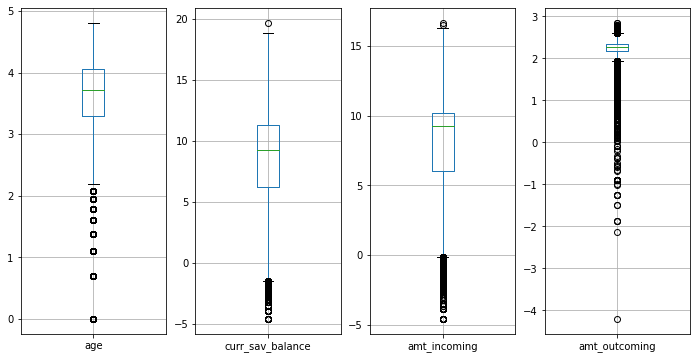

In [193]:
fig, axes = plt.subplots(figsize=(12,6),nrows=1, ncols=4)

np.log(data_cluster_model[['age']]).boxplot(ax=axes[0])
np.log(data_cluster_model[['curr_sav_balance']]).boxplot(ax=axes[1])
np.log(data_cluster_model[['amt_incoming']]).boxplot(ax=axes[2])
np.log(np.log(data_cluster_model[['amt_outcoming']])).boxplot(ax=axes[3])

We need to get rid of the outliers and also scale the data to do clustering

## 7 a. EDA on the data before processing - treating outliers

In [239]:
data_cluster_model_eda = data_cluster_model.copy()
data_cluster_model_eda['age_band'] = data_cluster_model_eda.apply(lambda row:'below_{}'.\
                                                                  format(data_cluster_model_eda.age.quantile(0.166))\
                   if row['age']<data_cluster_model_eda.age.quantile(0.166) else \
                                                                  
                   '{}'.format(data_cluster_model_eda.age.quantile(0.166))+'_'+'{}'.format(data_cluster_model_eda.age.quantile(0.333))\
                   if ((row['age']>=data_cluster_model_eda.age.quantile(0.166)) &\
                       (row['age']<data_cluster_model_eda.age.quantile(0.333))) else\
                                                                  
                   '{}'.format(data_cluster_model_eda.age.quantile(0.333))+'_'+'{}'.format(data_cluster_model_eda.age.quantile(0.499))\
                   if ((row['age']>=data_cluster_model_eda.age.quantile(0.333)) &\
                       (row['age']<data_cluster_model_eda.age.quantile(0.499))) else\
                                                                  
                   '{}'.format(data_cluster_model_eda.age.quantile(0.499))+'_'+'{}'.format(data_cluster_model_eda.age.quantile(0.667))\
                   if ((row['age']>=data_cluster_model_eda.age.quantile(0.499)) &\
                       (row['age']<data_cluster_model_eda.age.quantile(0.667))) else\
                                                                  
                   '{}'.format(data_cluster_model_eda.age.quantile(0.667))+'_'+'{}'.format(data_cluster_model_eda.age.quantile(0.833))\
                   if ((row['age']>=data_cluster_model_eda.age.quantile(0.667)) &\
                       (row['age']<data_cluster_model_eda.age.quantile(0.833))) else\
                    
                                                                  
                   '{}'.format(data_cluster_model_eda.age.quantile(0.833))+'+',axis=1)



#data_cluster_model_eda.head(20)

In [240]:
data_cluster_model_eda.head(5)

,age,curr_sav_balance,amt_incoming,amt_outcoming,age_band
cust_number,,,,,
0001258a514d77778fe1fb480b50179b,50,116442.01,14716.373333,18333.333333,41.0_52.0
0002beaa2347ccfe5664ce3f4507c899,65,3968784.57,733944.003333,26710.226667,64.0+
000330369cb856c502080a0aef60e646,42,34466.85,61097.686000,75363.320000,41.0_52.0
00044a7bb10793d72aa9672c22246866,45,722.39,8845.070000,8485.435000,41.0_52.0
0004bab32e7fc1d163e039d4f91b4890,35,79401.79,7974.830000,4718.000000,32.0_41.0


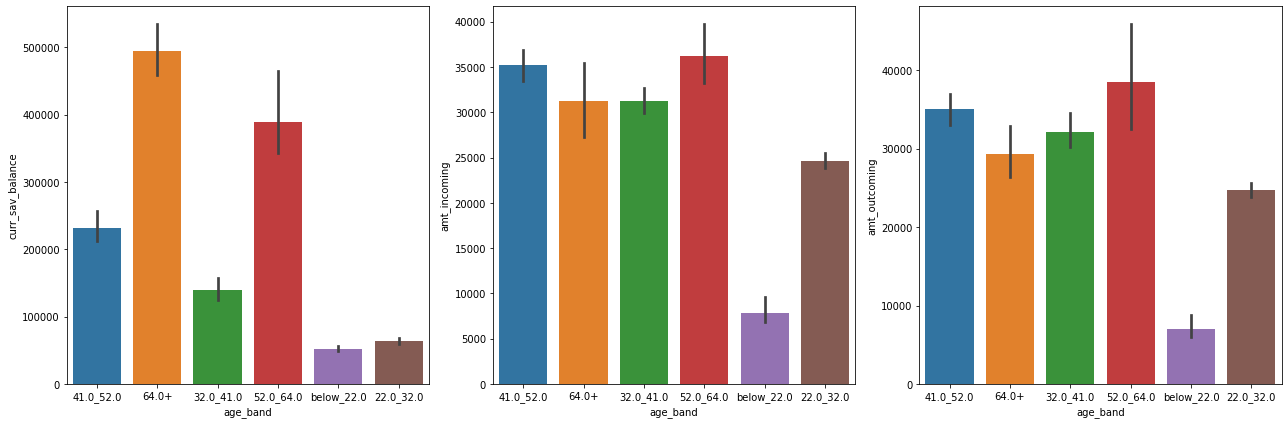

In [241]:
fig, ax= plt.subplots(figsize=(18, 6),nrows=1,ncols=3)
sns.barplot(x=data_cluster_model_eda['age_band'], y=data_cluster_model_eda['curr_sav_balance'],ax=ax[0])
sns.barplot(x=data_cluster_model_eda['age_band'], y=data_cluster_model_eda['amt_incoming'],ax=ax[1])
sns.barplot(x=data_cluster_model_eda['age_band'], y=data_cluster_model_eda['amt_outcoming'],ax=ax[2])
plt.tight_layout()

**Conclusion**

Age group `between 52 to 64 years`  has the highest average **amount incoming** and **amount outcoming** to and from their accounts respectively whereas age group `64+ years` has the highest average savings balance.

Age groups of `below 32 years`  however has the least average of savings balance as well as lowest average in terms of **amount incoming** and **amount outgoing**.

In [194]:
## Treat Outiers across all the variables

df=pd.DataFrame()
def outlier_treatment_replacement(df,col):
    
    # Computing 10th, 90th percentiles and replacing the outliers 
    tenth_percentile = np.percentile(df[col], 10) 
    ninetieth_percentile = np.percentile(df[col], 90) 
    df[col] = df.apply(lambda row: tenth_percentile if row[col]<tenth_percentile else ninetieth_percentile if row[col]>ninetieth_percentile else row[col],axis=1)
    return df[col]

In [195]:
data_cluster_model_final_data = data_cluster_model.copy()

data_cluster_model_final_data['age'] = outlier_treatment_replacement(data_cluster_model_final_data,'age')
data_cluster_model_final_data['curr_sav_balance'] = outlier_treatment_replacement(data_cluster_model_final_data,'curr_sav_balance')
data_cluster_model_final_data['amt_incoming'] = outlier_treatment_replacement(data_cluster_model_final_data,'amt_incoming')
data_cluster_model_final_data['amt_outcoming'] = outlier_treatment_replacement(data_cluster_model_final_data,'amt_outcoming')

In [196]:
data_cluster_model_final_data.head(2)

,age,curr_sav_balance,amt_incoming,amt_outcoming
cust_number,,,,
0001258a514d77778fe1fb480b50179b,50.0,116442.010,14716.373333,18333.333333
0002beaa2347ccfe5664ce3f4507c899,65.0,430575.728,53987.337333,26710.226667


## 7 b. EDA after processing the data - treating outliers

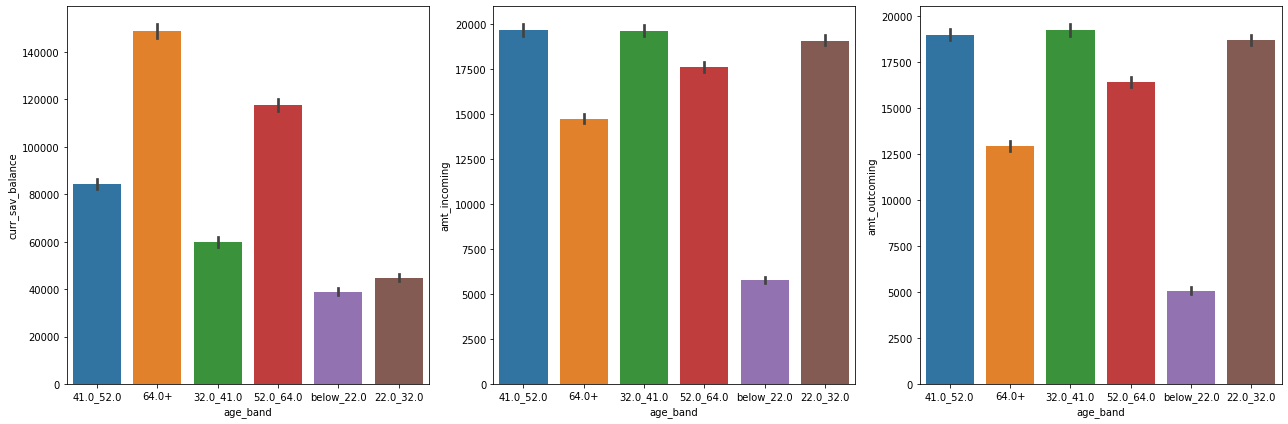

In [242]:
data_cluster_model_eda_post = data_cluster_model_final_data.copy()
data_cluster_model_eda_post['age_band'] = data_cluster_model_eda_post.apply(lambda row:'below_{}'.\
                                                                  format(data_cluster_model_eda_post.age.quantile(0.166))\
                   if row['age']<data_cluster_model_eda_post.age.quantile(0.166) else \
                                                                  
                   '{}'.format(data_cluster_model_eda_post.age.quantile(0.166))+'_'+'{}'.format(data_cluster_model_eda_post.age.quantile(0.333))\
                   if ((row['age']>=data_cluster_model_eda_post.age.quantile(0.166)) &\
                       (row['age']<data_cluster_model_eda_post.age.quantile(0.333))) else\
                                                                  
                   '{}'.format(data_cluster_model_eda_post.age.quantile(0.333))+'_'+'{}'.format(data_cluster_model_eda_post.age.quantile(0.499))\
                   if ((row['age']>=data_cluster_model_eda_post.age.quantile(0.333)) &\
                       (row['age']<data_cluster_model_eda_post.age.quantile(0.499))) else\
                                                                  
                   '{}'.format(data_cluster_model_eda_post.age.quantile(0.499))+'_'+'{}'.format(data_cluster_model_eda_post.age.quantile(0.667))\
                   if ((row['age']>=data_cluster_model_eda_post.age.quantile(0.499)) &\
                       (row['age']<data_cluster_model_eda_post.age.quantile(0.667))) else\
                                                                  
                   '{}'.format(data_cluster_model_eda_post.age.quantile(0.667))+'_'+'{}'.format(data_cluster_model_eda_post.age.quantile(0.833))\
                   if ((row['age']>=data_cluster_model_eda_post.age.quantile(0.667)) &\
                       (row['age']<data_cluster_model_eda_post.age.quantile(0.833))) else\
                    
                                                                  
                   '{}'.format(data_cluster_model_eda_post.age.quantile(0.833))+'+',axis=1)


fig, ax= plt.subplots(figsize=(18, 6),nrows=1,ncols=3)
sns.barplot(x=data_cluster_model_eda_post['age_band'], y=data_cluster_model_eda_post['curr_sav_balance'],ax=ax[0])
sns.barplot(x=data_cluster_model_eda_post['age_band'], y=data_cluster_model_eda_post['amt_incoming'],ax=ax[1])
sns.barplot(x=data_cluster_model_eda_post['age_band'], y=data_cluster_model_eda_post['amt_outcoming'],ax=ax[2])
plt.tight_layout()

## 7 c. Standardize all the columns

In [197]:
# Create the scalar.
from sklearn.preprocessing import StandardScaler
data_cluster_model_final_data_to_standardize = data_cluster_model_final_data.copy()
scaler = StandardScaler().fit(data_cluster_model_final_data_to_standardize)

# Standardize the columns.
data_cluster_model_final_data_standardized = data_cluster_model_final_data.copy()
standardized_columns = scaler.transform(data_cluster_model_final_data_to_standardize)
data_cluster_model_final_data_standardized = standardized_columns

In [198]:
data_cluster_model_final_data_standardized[:3]

array([[ 0.43279218,  0.23803331, -0.08524124,  0.16310871],
       [ 1.29628447,  2.48029433,  2.09574539,  0.62741302],
       [-0.02773704, -0.34709873,  2.09574539,  2.12102494]])

## 7 d. Get the Optimal number of clusters

#### `Elbow Method`

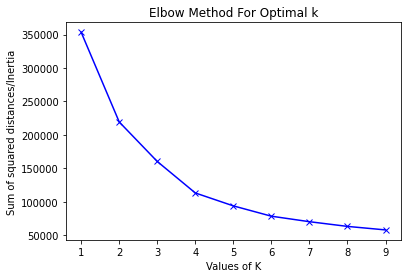

In [199]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state = 1000)
    kmeans.fit(data_cluster_model_final_data_standardized)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

#### `Silhouette Score Method`

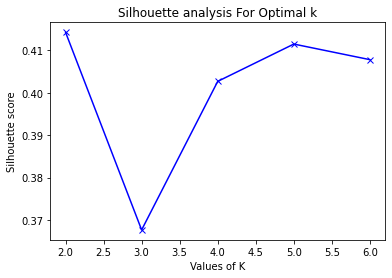

In [243]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state = 1000)
    kmeans.fit(data_cluster_model_final_data_standardized)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(data_cluster_model_final_data_standardized, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()


In [244]:
#silhouette_avg

**Conclusion regarding cluster size (k) selection**

From k-means we observe that with number of clusters (k) as 4 , we see a drastic drop in sum of square of distances within the clusters from their respective cluster centroids and from cluster sizes of 5 and above, the picture does not change significantly.

Also, through silhouette score we observe that there is not significant change in the score between number of clusters as 4 and 5 respectively. The change in the score is drastic when we observe the rate of change from cluster size as 3 to cluster size as 4.

## 7 e. Build the k-means model with the optimal number of clusters and get the clusters assigned to each of the rows of a dataframe

In [200]:
# Fit the model.
from sklearn.cluster import KMeans
N_CLUSTERS=4
model = KMeans( n_clusters=N_CLUSTERS, init='k-means++',random_state = 1000).fit(data_cluster_model_final_data_standardized)

# Get results.
data_cluster_model_final_data['cluster'] = model.predict(data_cluster_model_final_data_standardized)

In [201]:
data_cluster_model_final_data.head(2)

,age,curr_sav_balance,amt_incoming,amt_outcoming,cluster
cust_number,,,,,
0001258a514d77778fe1fb480b50179b,50.0,116442.010,14716.373333,18333.333333,0
0002beaa2347ccfe5664ce3f4507c899,65.0,430575.728,53987.337333,26710.226667,1


## 7 f. Summarize individual clusters based on `Median` of variables of each cluster group

In [202]:
data_cluster_model_final_data.groupby('cluster')[['age','curr_sav_balance','amt_incoming','amt_outcoming']].median()

,age,curr_sav_balance,amt_incoming,amt_outcoming
cluster,,,,
0,59.0,5025.185,3223.07,2648.050000
1,58.0,430575.728,27037.26,17203.422833
2,38.0,18363.030,40790.45,42668.615000
3,25.0,2068.290,1500.00,885.500000


In [203]:
data_cluster_model_final_data['cluster'].value_counts()

3    33413
0    25564
2    17082
1    12296
Name: cluster, dtype: int64

## 7 g. Get the most popular 7 items by cluster for each of the clusters above 

In [204]:
data_cluster_for_recommendation = pd.merge(data_cluster_model_final_data.reset_index()[['cust_number','cluster']],\
                                           data_for_clustering[['cust_number', 'is_local_currency_acc',\
                                                             'is_foreign_currency_acc',\
       'is_fd_foreign_currency_acc', 'is_fd_local_currency_acc',\
       'is_car_loan_acc', 'is_edu_loan_acc', 'is_gen_loan_acc',\
       'is_home_loan_acc', 'is_personal_loan_acc', 'is_one_time_inv_acc',\
       'is_mly_edu_plan_acc', 'is_mly_retire_plan_acc', 'is_amex_gold_acc',\
       'is_amex_green_acc', 'is_mstrcrd_foreign_acc', 'is_mstrcrd_primo_acc',\
       'is_neo_bundle_acc']],how='inner',on='cust_number')

In [205]:
data_cluster_for_recommendation.set_index('cust_number',inplace=True)

In [206]:
data_cluster_for_recommendation.head(2)

,cluster,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc
cust_number,,,,,,,,,,,,,,,,,,
0001258a514d77778fe1fb480b50179b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002beaa2347ccfe5664ce3f4507c899,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [207]:
cluster_0_recommended_items = popularity_based(data_cluster_for_recommendation[data_cluster_for_recommendation.cluster==0])
cluster_1_recommended_items = popularity_based(data_cluster_for_recommendation[data_cluster_for_recommendation.cluster==1])
cluster_2_recommended_items = popularity_based(data_cluster_for_recommendation[data_cluster_for_recommendation.cluster==2])
cluster_3_recommended_items = popularity_based(data_cluster_for_recommendation[data_cluster_for_recommendation.cluster==3])

## 7 h. Recommendation dataset for users with less than 3 purchases

In [208]:
data_cluster_for_recommendation_revised = data_cluster_for_recommendation.reset_index()[['cust_number','cluster', 'is_local_currency_acc',
       'is_foreign_currency_acc', 'is_fd_foreign_currency_acc',
       'is_fd_local_currency_acc', 'is_car_loan_acc', 'is_edu_loan_acc',
       'is_gen_loan_acc', 'is_home_loan_acc', 'is_personal_loan_acc',
       'is_one_time_inv_acc', 'is_mly_edu_plan_acc', 'is_mly_retire_plan_acc',
       'is_amex_gold_acc', 'is_amex_green_acc', 'is_mstrcrd_foreign_acc',
       'is_mstrcrd_primo_acc', 'is_neo_bundle_acc']].copy()

In [209]:
data_cluster_for_recommendation_revised.loc[-1] = [data_cluster_for_recommendation_revised.columns[0],\
    data_cluster_for_recommendation_revised.columns[1],data_cluster_for_recommendation_revised.columns[2],\
    data_cluster_for_recommendation_revised.columns[3],data_cluster_for_recommendation_revised.columns[4],data_cluster_for_recommendation_revised.columns[5],\
    data_cluster_for_recommendation_revised.columns[6],data_cluster_for_recommendation_revised.columns[7],data_cluster_for_recommendation_revised.columns[8],\
    data_cluster_for_recommendation_revised.columns[9],data_cluster_for_recommendation_revised.columns[10],data_cluster_for_recommendation_revised.columns[11],\
    data_cluster_for_recommendation_revised.columns[12],data_cluster_for_recommendation_revised.columns[13],data_cluster_for_recommendation_revised.columns[14],\
    data_cluster_for_recommendation_revised.columns[15],data_cluster_for_recommendation_revised.columns[16],\
    data_cluster_for_recommendation_revised.columns[17],data_cluster_for_recommendation_revised.columns[18]]# adding a row

data_cluster_for_recommendation_revised.index = data_cluster_for_recommendation_revised.index + 1  # shifting index
    
data_cluster_for_recommendation_revised = data_cluster_for_recommendation_revised.sort_index()  

In [210]:
data_cluster_for_recommendation_revised.head()

,cust_number,cluster,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc
0,cust_number,cluster,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc
1,0001258a514d77778fe1fb480b50179b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0002beaa2347ccfe5664ce3f4507c899,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,000330369cb856c502080a0aef60e646,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00044a7bb10793d72aa9672c22246866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
## Renaming the products

for i in data_cluster_for_recommendation_revised.columns[2:data_cluster_for_recommendation_revised.shape[1]]:
    data_cluster_for_recommendation_revised.at[0,i] = data_cluster_for_recommendation_revised.at[0,i][3:]

In [212]:
data_cluster_for_recommendation_revised.head(1)

,cust_number,cluster,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc
0,cust_number,cluster,local_currency_acc,foreign_currency_acc,fd_foreign_currency_acc,fd_local_currency_acc,car_loan_acc,edu_loan_acc,gen_loan_acc,home_loan_acc,personal_loan_acc,one_time_inv_acc,mly_edu_plan_acc,mly_retire_plan_acc,amex_gold_acc,amex_green_acc,mstrcrd_foreign_acc,mstrcrd_primo_acc,neo_bundle_acc


In [213]:
## Wherever at customer level, indicator of the respective product purchase is 1 , then replace 1 by the name of the product, otherwise 0

for i in range(0,data_cluster_for_recommendation_revised.shape[0]):
    for j in data_cluster_for_recommendation_revised.columns[2:data_cluster_for_recommendation_revised.shape[1]]:
        if data_cluster_for_recommendation_revised.at[i,j]==0:
            data_cluster_for_recommendation_revised.at[i,j] = 0
        else:
            data_cluster_for_recommendation_revised.at[i,j] = data_cluster_for_recommendation_revised.at[0,j]

In [214]:
data_cluster_for_recommendation_revised[data_cluster_for_recommendation_revised.is_local_currency_acc!=0].head(3)

,cust_number,cluster,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc
0,cust_number,cluster,local_currency_acc,foreign_currency_acc,fd_foreign_currency_acc,fd_local_currency_acc,car_loan_acc,edu_loan_acc,gen_loan_acc,home_loan_acc,personal_loan_acc,one_time_inv_acc,mly_edu_plan_acc,mly_retire_plan_acc,amex_gold_acc,amex_green_acc,mstrcrd_foreign_acc,mstrcrd_primo_acc,neo_bundle_acc
26,001282c2cb6c3f51abd24cd18d92043f,2,local_currency_acc,foreign_currency_acc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0014e9786628307a49fd3b6fec28dc06,0,local_currency_acc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
data_cluster_for_recommendation_revised.set_index(['cust_number','cluster'],inplace=True)
data_cluster_for_recommendation_revised['purchased_products'] = data_cluster_for_recommendation_revised.apply(tuple, axis=1)
data_cluster_for_recommendation_revised =data_cluster_for_recommendation_revised.reset_index()
data_cluster_for_recommendation_revised2 = data_cluster_for_recommendation_revised.iloc[1:,:]
data_cluster_for_recommendation_revised2.head()

,cust_number,cluster,is_local_currency_acc,is_foreign_currency_acc,is_fd_foreign_currency_acc,is_fd_local_currency_acc,is_car_loan_acc,is_edu_loan_acc,is_gen_loan_acc,is_home_loan_acc,is_personal_loan_acc,is_one_time_inv_acc,is_mly_edu_plan_acc,is_mly_retire_plan_acc,is_amex_gold_acc,is_amex_green_acc,is_mstrcrd_foreign_acc,is_mstrcrd_primo_acc,is_neo_bundle_acc,purchased_products
1,0001258a514d77778fe1fb480b50179b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)"
2,0002beaa2347ccfe5664ce3f4507c899,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)"
3,000330369cb856c502080a0aef60e646,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)"
4,00044a7bb10793d72aa9672c22246866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)"
5,0004bab32e7fc1d163e039d4f91b4890,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)"


## 7 i. `For each cluster get the top 10 recommended products`

In [216]:
def cluster_wise_top_recommended_items(cluster):
    df=pd.DataFrame()
    df = pd.DataFrame(popularity_based(data_cluster_for_recommendation[data_cluster_for_recommendation.cluster==cluster]),index=[0]).T.reset_index()
    df['index'] = df.apply(lambda row:row['index'][3:] , axis=1)
    k = tuple(df.sort_values(by=0,ascending=False)[:10]['index'][:10])
    return k

In [217]:
cluster_0_recommended_items = cluster_wise_top_recommended_items(0)
cluster_1_recommended_items = cluster_wise_top_recommended_items(1)
cluster_2_recommended_items = cluster_wise_top_recommended_items(2)
cluster_3_recommended_items = cluster_wise_top_recommended_items(3)

In [218]:
cluster_top_recommend_dict = {'0':cluster_0_recommended_items,'1':cluster_1_recommended_items,'2':cluster_2_recommended_items,'3':cluster_3_recommended_items}

In [219]:
cluster_top_recommend_df =pd.DataFrame(cluster_top_recommend_dict).T
cluster_top_recommend_df['recommended_products']= cluster_top_recommend_df.apply(tuple,1)

In [220]:
cluster_top_recommend_df = cluster_top_recommend_df.reset_index().rename(columns={'index':'cluster'})

In [221]:
cluster_top_recommend_df = cluster_top_recommend_df[['cluster','recommended_products']]

In [222]:
cluster_top_recommend_df['cluster'] = cluster_top_recommend_df['cluster'].astype('int')

## 7 j.  Append the above `two dataframes` to map cluster wise recommended products against each customer`

In [223]:
data_cluster_for_recommendation_revised2.shape,data_cluster_for_recommendation_revised2.cust_number.nunique()

((88355, 20), 88355)

In [224]:
## First de-select the customers for whom personalized recommendations have already been made

data_cluster_for_recommendation_revised3 = pd.merge(data_cluster_for_recommendation_revised2,data_a4[['cust_number']],how='inner',on='cust_number')
data_cluster_for_recommendation_revised3.shape,data_cluster_for_recommendation_revised3.cust_number.nunique()

((86229, 20), 86229)

In [225]:
## For these customers recommendations have already been completed before (Personalized Recommendations)

data_cluster_for_recommendation_revised2.cust_number.nunique() - data_cluster_for_recommendation_revised3.cust_number.nunique()

2126

In [226]:
data_cluster_for_recommendation_revised4 = pd.merge(data_cluster_for_recommendation_revised3,cluster_top_recommend_df, how='inner',on='cluster')

In [227]:
data_cluster_for_recommendation_revised4['final_recommended_products'] = data_cluster_for_recommendation_revised4.apply(lambda row: list(OrderedSet(row['recommended_products']) - OrderedSet(row['purchased_products'])),axis=1)
data_cluster_for_recommendation_revised4['final_recommendation'] = data_cluster_for_recommendation_revised4.apply(lambda row: row['final_recommended_products'][:3],axis=1)

In [228]:
df_recommendation_nonpersonalized = data_cluster_for_recommendation_revised4.iloc[1:,:][['cust_number','final_recommendation']]
df_recommendation_nonpersonalized.head(2)

,cust_number,final_recommendation
1,00044a7bb10793d72aa9672c22246866,"[local_currency_acc, fd_local_currency_acc, mstrcrd_primo_acc]"
2,0004cf0d15059c16f75646b9dfc39974,"[local_currency_acc, fd_local_currency_acc, mstrcrd_primo_acc]"


In [229]:
df_recommendation_nonpersonalized.shape

(86228, 2)

## 7 k. `Concat the two dataframes with top 3 products recommended  per user into a single one`

In [230]:
df_recommendation_all = df_recommendation_nonpersonalized.append(df_recommendation_personalized)

In [237]:
df_recommendation_all = df_recommendation_all.set_index('cust_number')

In [238]:
path_output = os.path.join(dir_up(path_m,1),'Output')
df_recommendation_all.to_excel(os.path.join(path_output,'top_items_recommended.xlsx'))